# Исследование объявлений о продаже квартир
**Цель исследования:** 
  
Определить рыночную стоимость объектов недвижимости. Определить параметры и построить автоматизированную систему, которая поможет отследить аномалии и мошенническую деятельность.

## Изучение данных из файла

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# чтение файла
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
# получение первых 10 строк таблицы df
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Рассмотрев таблицу видим, что каждая строка таблицы содержит информацию о квартирах, выставленных на продажу: 
      
    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах(м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении

Изучим общую информацию о таблице.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Рассмотрев полученную информацию о данных в таблице видим, что количество значений в столбцах различается. Это говорит о том, что в данных есть пропущенные значения.   
В столбце **is_apartment** тип данных не соответствует булевому типу. Во многих столбцах тип данных вещественный. 

### Вывод

Проблемы, которые нужно решать: пропуски в данных, приведение данных об аппартаментах к булевому типу, замена значений в столбцах на целочисленный тип данных.  

## Предобработка данных

### Обработка пропусков

Определим количество пропущенных значений в столбцах таблицы:

In [5]:
# суммарное количество пропусков
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Мы можем обработать пропущенные значения в столбцах: **ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, days_exposition.** 
  
В столбце **locality_name** всего **49 пропущенных значений**, что составляет **0,21% от всех значений**. Так как этот столбец относится к категориальным переменным и мы не можем предложить подходящую замену, то удалим эти строки. Это не повлияет значительно на результаты исследования.  
  
В столбцах **airports_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest** пропуски в данных могут означать отсутствие аэропорта, парков или водоемов поблизости. В столбце **cityCenters_nearest** также есть пропущенные данные. Мы не можем заполнить эти значения нулем, средним или медианой, поэтому оставим пропуски.  

Посмотрим на зависмость жилой площади и площади кухни от общей площади, чтобы выбрать метод заполнения пропусков.

In [6]:
df.corr()[['living_area', 'kitchen_area']]

,living_area,kitchen_area
total_images,0.104780,0.104756
last_price,0.566492,0.519869
total_area,0.939537,0.609121
rooms,0.845977,0.269945
ceiling_height,0.090650,0.087641
floors_total,-0.169311,0.163944
living_area,1.000000,0.428674
floor,-0.097210,0.135531
studio,-0.056231,NaN
open_plan,-0.033711,NaN


Действительно коэффициенты корреляции составляют 0,9 и 0,6. Значит зависмость большая. Таким образом для того, чтобы обработать пропуски в данных о площади кухни и жилой площади, можем рассчитать коэффициент соотношения общей и жилой площади в зависимости от количества комнат в квартире.

* столбец **locality_name**

Удалим строки с пропусками в данных о названиях населенных пунктов.

In [7]:
# удаление строк с прощенным значением в столбце locality_name
df.dropna(subset=['locality_name'], inplace=True)

* столбец **floors_total**

В регионах чаще всего используют типовую застройку жилья. Для того, чтобы заполнить пропуски в данных об общем количестве этажей в здании сгруппируем данные по регионам и воспользуемся медианой общей этажности, чтобы исключить влияние выбросов на результат. 

In [8]:
# группировка данных по регионам и расчет медианы общей этажности
floors_total_median = df.groupby('locality_name')['floors_total'].median()

In [9]:
# проверка результата
floors_total_median.head()

locality_name
Бокситогорск    5.0
Волосово        5.0
Волхов          5.0
Всеволожск      9.0
Выборг          5.0
Name: floors_total, dtype: float64

Заполним пропуски медианой в тех случаях, когда текущий этаж не будет превышать медиану.

In [10]:
# заполнение пропусков в столбце floors_total медианой этажности по региону
for index in floors_total_median.index:
    df.loc[(df['floors_total'].isna()) & (df['locality_name'] == index) & (df['floor'] <= floors_total_median[index]),
             'floors_total'] = floors_total_median[index]

Оставшиеся пропуски заполним значением текущего этажа.

In [11]:
df['floors_total'] = df['floors_total'].fillna(df['floor'])

* столбец **ceiling_height**

При использовании типовой застройки в многоэтажных домах чаще всего используют схожие параметры размерности. Для того, чтобы заполнить пропуски в данных о высоте потолков в квартирах сгруппируем данные по зданиям с одинаковым количеством этажей и воспользуемся медианой высоты потолков, чтобы исключить влияние выбросов на результат. 

In [12]:
# группировка данных по общей этажности зданий и расчет медианы высоты потолков
ceiling_height_median = df.groupby('floors_total')['ceiling_height'].median()

In [13]:
# проверка результата
ceiling_height_median.head()

floors_total
1.0    2.80
2.0    2.70
3.0    2.80
4.0    3.00
5.0    2.55
Name: ceiling_height, dtype: float64

In [14]:
# заполнение пропусков в столбце ceiling_height медианой жилой площади 
for index in ceiling_height_median.index:
    df.loc[(df['ceiling_height'].isna()) & (df['floors_total'] == index), 'ceiling_height'] = ceiling_height_median[index]

Проверим результат:

In [15]:
print('Пропущенных значений:', df['ceiling_height'].isnull().sum())

Пропущенных значений: 2


Осталось еще 2 попущенных значения, так как возможно, что для зданий с определенным количеством этажей не было данных о высоте потолков. Заполним эти пропуски общей медианой высоты потолков. 

In [16]:
# определение общей медианы высоты потолков
print('Медиана высоты потолков:', df['ceiling_height'].median())

Медиана высоты потолков: 2.65


In [17]:
# замена пропущенных значений в столбце медианой 
df['ceiling_height'] = df['ceiling_height'].fillna(2.65)

* столбец **living_area**

Для того, чтобы заполнить пропуски в данных о жилой площади в квартирах посчитаем коэффициент соотношения общей и жилой площади в зависимости от количества комнат.

In [18]:
# расчет коэффициента отношения жилой площади к общей в зависимости от количества комнат
ratio_living_area_by_total = df.groupby('rooms')['living_area'].sum() / df.groupby('rooms')['total_area'].sum()

In [19]:
# проверка результата
ratio_living_area_by_total.head()

rooms
0    0.598522
1    0.436587
2    0.522207
3    0.562442
4    0.574376
dtype: float64

In [20]:
# заполнение пропусков в столбце в соответсвии с коэффициентом соотношения 
for index in ratio_living_area_by_total.index:
    df.loc[(df['living_area'].isna()) & (df['rooms'] == index), 
           'living_area'] = df.loc[(df['living_area'].isna()) & (df['rooms'] == index), 
                                   'total_area'] * ratio_living_area_by_total[index]

* столбцы **balcony**, **is_apartment** и **days_exposition**

Пропуски в данных о количестве **балконов** свидетельствуют об отсутствии балконов, заполним такие пропуски нулями.
  
Доля апартаментов относительно общего количества квартир очень мала, поэтому можно предположить, что для всех апартаментов в столбце **is_apartment** заполнено значение *True*, а для квартир этот показатель не заполнен. Поэтому заполним отсутствующие значения *False* .  
  
В столбце **days_exposition** вероятнее всего присутствуют пропуски в связи с тем, что на момент получения данных квартиры еще не были проданы. Заполнить такие пропуски нулем или медианой или средним значением нельзя, так как это существенно исказит результаты исследования. Оставим эти пропуски незаполненными. 

In [21]:
# замена пропущенных значений в столбцах 
df = df.fillna({'is_apartment': False, 'balcony': 0}) 

* столбец **kitchen_area**

Для того, чтобы заполнить пропуски в данных о площади кухни в квартирах посчитаем коэффициент соотношения общей площади и и площади кухни в зависимости от количества комнат.

In [22]:
# расчет коэффициента отношения площади кухни к общей в зависимости от количества комнат
ratio_kitchen_area_by_total = df.groupby('rooms')['kitchen_area'].sum() / df.groupby('rooms')['total_area'].sum()

In [23]:
# проверка результата
ratio_kitchen_area_by_total.head()

rooms
0    0.000000
1    0.227451
2    0.163963
3    0.134614
4    0.116279
dtype: float64

In [24]:
# заполнение пропусков в столбце в соответсвии с коэффициентом соотношения 
for index in ratio_kitchen_area_by_total.index:
    df.loc[(df['kitchen_area'].isna()) & (df['rooms'] == index), 
           'kitchen_area'] = df.loc[(df['kitchen_area'].isna()) & (df['rooms'] == index), 
                                   'total_area'] * ratio_kitchen_area_by_total[index]

In [25]:
# проверка результата
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.75,11.0,18.600000,1,False,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.55,5.0,34.300000,4,False,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.60,14.0,89.428284,9,False,...,21.403669,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


В столбцах **living_area** и **kitchen_area** цифры имеют много знаков после запятой. Округлим их до двух знаков, чтобы все данные о площади были однотипны.

In [26]:
# округление данных
df = df.round({'living_area': 2, 'kitchen_area': 2})

Проверим количество пропущенных значений в столбцах таблицы:

In [27]:
# проверка результата
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

#### Вывод

Мы обработали пропуски во всех столбцах, в которых это было целесообразно. Оставшиеся пропуски в данных, полученных из автоматической системы. Их можно объяснить таким фактором, как отсутствие аэропортов, парков или водоемов в определенном радиусе, либо ошибки в системе, как в случае отсутствия информации о расстоянии до центра.

### Замена типа данных

В таблице в столбцах **balcony, floors_total** и **last_price** данные относятся к вещественному типу. В данном случае нам не нужна такая точность, к тому же это может привести к некорректному отображению целочисленных данных. Приведем данных в этих столбцах к целочисленному типу данных.

In [28]:
# замена типа данных в столбцах на int
df = df.astype({'balcony': 'int64', 'floors_total': 'int64', 'last_price': 'int64'})   

Для того, чтобы данные отображались корректны и по ним можно было проводить анализ необходимо перевести данные в столбце **first_day_exposition** в формат *datetime*.

In [29]:
# перевод данных в тип datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [30]:
# проверка результата
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.60,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.30,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.60,14,89.43,9,False,...,21.4,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [31]:
# проверка результата
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int64         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

#### Вывод

Мы изменили данные в столбцах с количеством балконов, этажей и ценой продажи на целочисленный тип данных. Данные в столбце о первом дне подачи объявления теперь имеют тип *datetime* и с ними можно проводить расчеты.

### Обработка дубликатов

Для того, чтобы проверить данные на наличие дубликатов приведем строки в столбце **locality_name** к нижнему регистру.

In [32]:
# приведение данных в столбце к нижнему регистру
df['locality_name'] = df['locality_name'].str.lower()

Проверим данные на наличие явных дубликатов:

In [33]:
# получение суммарного количества дубликатов в таблице df
print('Количество дубликатов:', df.duplicated().sum())

Количество дубликатов: 0


Проверим данные на неявные дубликаты. Для этого посмотрим список уникальных значений в столбце **locality_name **.

In [34]:
# получение уникальных значений в столбце locality_name
df['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [35]:
print('Количество наименований:', len(df['locality_name'].unique()))

Количество наименований: 364


Можно увидеть, что слова посЕлок и посЁлок написаны по-разному и есть такие значения как "мурино" и "поселок мурино". Все это одни и те же регионы, однако записаны они по-разному и поэтому в исследовании будут отражаться как разные регионы. Исправим букву Ё на букву Е в наименованиях и заменим "мурино" на "поселок мурино".

In [36]:
# замена ё на е
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex = True)

In [37]:
# замена "мурино" на "поселок мурино"
df.loc[df['locality_name'] == 'мурино', 
       'locality_name'] = df.loc[df['locality_name'] == 'мурино', 
                                 'locality_name'].str.replace('мурино', 'поселок мурино', regex = True)

In [38]:
# проверка результата
print('Количество наименований:', len(df['locality_name'].unique()))

Количество наименований: 329


#### Вывод

Мы проверили данные на дубликаты и уменьшили количество вариантов наименований регионов с 364 до 329.

## Расчёты и добавление результатов в таблицу

Для проведения дальнейшего исследования нам понадобятся дополнительные данные. Произведем необходимые расчеты и добавим результаты в таблицу.

- **Расчет цены квадратного метра**

Расчитаем и добавим в таблицу цену за квадратный метр площади.

In [39]:
# добавление цены за квадратный метр
df['square_meter_price'] = (df['last_price'] / df['total_area']).astype(int)

- **Определение дня недели, месяца и года публикации объявления** 

Добавим в таблицу год и месяц публикации объявления о продаже.

In [40]:
# год публикации объявления
df['year_exposition'] = df['first_day_exposition'].dt.year

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int64         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

In [42]:
# месяц публикации объявления
df['month_exposition'] = df['first_day_exposition'].dt.month

Для добавления дня недели публикации объявления о продаже создадим словарь, который заменит значения от 0 до 6 на соответствующие дни недели.

In [43]:
# словарь
weekday_dict = ({0:'понедельник', 1:'вторник', 2:'среда', 3:'четверг', 4:'пятница', 5:'суббота', 6:'воскреснье'})

In [44]:
# день недели публикации объявления
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday

In [45]:
# замена значений в столбце weekday_exposition в соответсви со словарем weekday_dict
for key in weekday_dict:
    df.loc[df['weekday_exposition'] == key, 'weekday_exposition'] = weekday_dict[key]

- **Определение этажа квартиры**

Для добавления в таблицу категории этаже напишем функцию, которая будет принимать данные о текущем этаже и исходя из этого будут добавлять этаж: "первый", "последний" или "другой".

In [46]:
def set_level_floor(row):
    if row['floor'] == row['floors_total']:
        return 'последний'
    if row['floor'] == 1:
        return 'первый'
    return 'другой' 

In [47]:
df['floor_level'] = df.apply(set_level_floor, axis=1)

- **Определение соотношения жилой и общей площади, а также отношения площади кухни к общей**

Для определения соотношения жилой площади к общей и отношения площади кухни к общей площади рассчитаем коэффициенты соотношения и округлим результаты до 2 знаков после запятой.

In [48]:
# коэффициент соотношения жилой площади к общей 
df['living_area_ratio'] = (df['living_area'] / df['total_area']).round(2) 

In [49]:
# коэффициент соотношения площади кухни к общей площади 
df['kitchen_area_ratio'] = (df['kitchen_area'] / df['total_area']).round(2)

- **Перевод цены в тысячи**

Для более удобного и наглядного отражения информации создадим новый столбец, в котором отразим цену продажи квартиры в тысячах.

In [50]:
# добавление цены в тысячах
df['price_thousands'] = (df['last_price'] / 1000).astype(int)

Для удобства пользования таблицей сделаем перемещение колонок.

In [51]:
# перемещение колонок
df = df[['total_images', 'last_price', 'price_thousands', 'total_area', 'square_meter_price', 'first_day_exposition', 'rooms', 'ceiling_height', 
        'floors_total', 'floor', 'floor_level', 'is_apartment', 'studio', 'open_plan', 'living_area', 'living_area_ratio', 
        'kitchen_area', 'kitchen_area_ratio', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 
        'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition', 'year_exposition', 
        'month_exposition', 'weekday_exposition']]

Проверим результаты расчетов:

In [52]:
# проверка реультатов
df.head()

,total_images,last_price,price_thousands,total_area,square_meter_price,first_day_exposition,rooms,ceiling_height,floors_total,floor,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,weekday_exposition
0,20,13000000,13000,108.0,120370,2019-03-07,3,2.70,16,8,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2019,3,четверг
1,7,3350000,3350,40.4,82920,2018-12-04,1,2.75,11,1,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018,12,вторник
2,10,5196000,5196,56.0,92785,2015-08-20,2,2.55,5,4,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015,8,четверг
3,0,64900000,64900,159.0,408176,2015-07-24,3,2.60,14,9,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2015,7,пятница
4,2,10000000,10000,100.0,100000,2018-06-19,2,3.03,14,13,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2018,6,вторник


### Вывод

Мы рассчитали и добавили в таблицу:  
- цену квадратного метра;  
- день недели, месяц и год публикации объявления;  
- этаж квартиры; варианты — первый, последний, другой;  
- соотношение жилой и общей площади, а также отношение площади кухни к общей;
- цену продажи квартиры в тысячах.

## Исследовательский анализ данных

### Площадь, цена, число комнат, высота потолков

Изучим такие параметры, как: **площадь, цена, число комнат, высота потолков**. 

Воспользуемся методом описательной статистики и построим гистограммы для общей площади квартиры, цены, числа комнат и высоты потолков

In [53]:
# описание
df.describe()

,total_images,last_price,price_thousands,total_area,square_meter_price,rooms,ceiling_height,floors_total,floor,living_area,...,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition
count,23650.000000,2.365000e+04,23650.000000,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,...,23650.000000,18116.000000,18139.000000,18140.000000,8064.000000,18140.000000,9085.000000,20470.000000,23650.000000,23650.000000
mean,9.862326,6.541127e+06,6541.111036,60.329069,9.943180e+04,2.070106,2.735459,10.682452,5.893277,34.345568,...,0.591712,28803.225878,14197.860742,0.611577,490.830729,0.769680,518.059879,180.753200,2017.370021,6.401564
std,5.682278,1.089640e+07,10896.394247,35.661808,5.033794e+04,1.078620,0.995243,6.590616,4.883317,22.403598,...,0.959662,12637.314144,8606.830295,0.802003,342.554386,0.937948,277.841733,219.777916,1.037806,3.491418
min,0.000000,1.219000e+04,12.000000,12.000000,1.110000e+02,0.000000,1.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,2014.000000,1.000000
25%,6.000000,3.400000e+06,3400.000000,40.000000,7.661425e+04,1.000000,2.550000,5.000000,2.000000,18.600000,...,0.000000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,45.000000,2017.000000,3.000000
50%,9.000000,4.650000e+06,4650.000000,52.000000,9.500000e+04,2.000000,2.650000,9.000000,4.000000,30.000000,...,0.000000,26756.500000,13105.000000,0.000000,454.500000,1.000000,502.000000,95.000000,2017.000000,6.000000
75%,14.000000,6.799000e+06,6799.000000,69.700000,1.142740e+05,3.000000,2.750000,16.000000,8.000000,42.000000,...,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000,2018.000000,10.000000
max,50.000000,7.630000e+08,763000.000000,900.000000,1.907500e+06,19.000000,100.000000,60.000000,33.000000,409.700000,...,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,2019.000000,12.000000


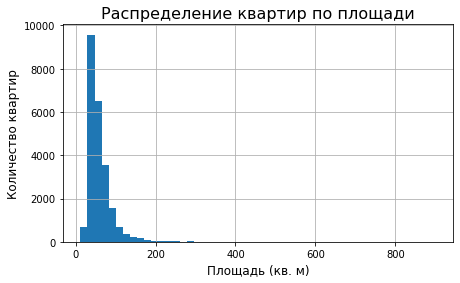

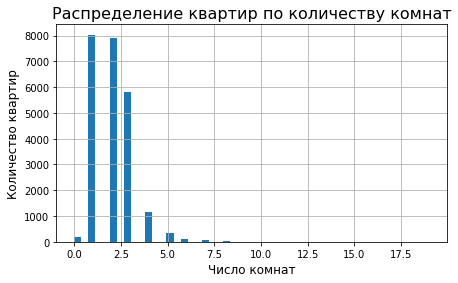

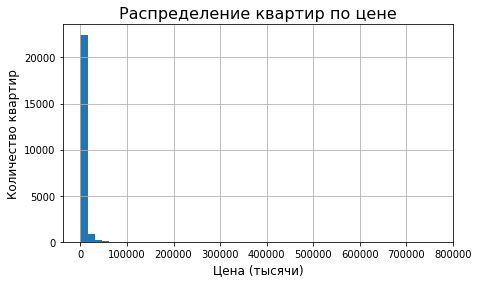

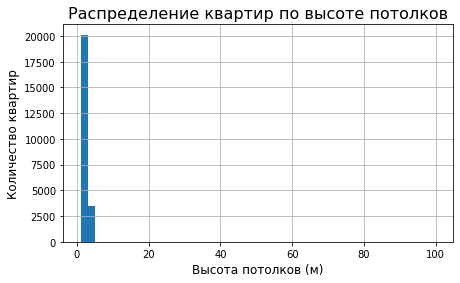

In [54]:
# гистораммы для площади квартиры, цены, числа комнат и высоты потолков
dict_of_columns = ({'total_area' : 'Площадь (кв. м)', 'rooms' : 'Число комнат', 
                      'price_thousands' : 'Цена (тысячи)', 'ceiling_height' : 'Высота потолков (м)'})
dict_titles_list_1 = ({'total_area' :'Распределение квартир по площади', 'rooms' : 'Распределение квартир по количеству комнат',
                       'price_thousands' : 'Распределение квартир по цене',
                       'ceiling_height' : 'Распределение квартир по высоте потолков'})

for key in dict_of_columns:
    df.hist(column=key, bins=50, figsize=(7, 4))
    plt.title(dict_titles_list_1[key], fontsize = 16) 
    plt.xlabel(dict_of_columns[key], fontsize = 12)
    plt.ylabel('Количество квартир', fontsize = 12)   

На **первой гистограмме** мы видим, что пик гистограммы смещен к району 2 - 3 метров. Минимальное значение 1 метр, есть отдельные выбросы доходящие до 100 метров. Среднее значение высоты - 2,74 метра, а медиана составляет 2,65 метров, что выглядит вполне правдоподобно. Гистограмма имеет очень длинный хвост вправо.   

На **второй гистограмме** видно, что по цене более 50 млн. практически нет предложений, однако есть выбросы до 763 млн., но их очень мало. Практически все данные сосредоточены в начале гистограммы. Минимальная цена составляет 12 тысяч, что также очень странно. Средняя цена 6 541 тыс., медиана - 4 650 тыс. Посмотрим подробнее на область до 40 млн.

На **третьей гистограмме** заметно, что количество комнат варьируется от 0 до 19. Пик приходится на 1 - 2 комнатные квартиры. Практически не встречаются предложения квартир имеющих более 7 комнат. 

На **четвертой гистограмме** видно, что в основном жилые помещения имеют площадь от 20 до 200 квадратных метров, есть отдельные выбросы до 900 квадратных метров. Минимальная площадь помещения 12 квадратных метров. Посмотрим подробнее на область от 12 до 150 квадратных метров. Средняя площадь 60,33 кв. м, медиана - 52 кв. м.

Изменим масштаб гистограмм и рассмотрим их подробнее.

In [55]:
# функция вычисления диапозонов для гистограммы
def set_range_hist(data, column):
    q1 = data[column].quantile(.25)
    q3 = data[column].quantile(.75)
    iqr = q3 - q1
    range_1 = q1-3*iqr
    range_2 = q3+3*iqr
    if range_1 < 0:
        range_1 = 0
    return range_1, range_2

In [56]:
# функция построения гистограммы
def make_hist(data, column, bins):
    ranges = set_range_hist(data, column)
    data.hist(column=[column], bins=bins, range=(ranges[0], ranges[1]), figsize=(7, 4))
    plt.title(dict_titles_list_1[column], fontsize = 16) 
    plt.xlabel(dict_of_columns[column], fontsize = 12)
    plt.ylabel('Количество квартир', fontsize = 12)

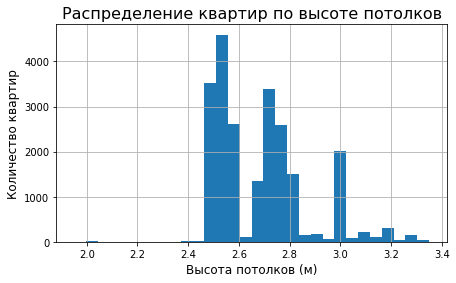

In [57]:
# гистограмма по высоте потолков
make_hist(df, 'ceiling_height', 30)

Действительно, пики как раз приходится на 2,5 и на 2,7 метра. В основном квартиры имеют высоту потолков от 2,5 до 3 метров. Высота более 3 метров редко встречается. 

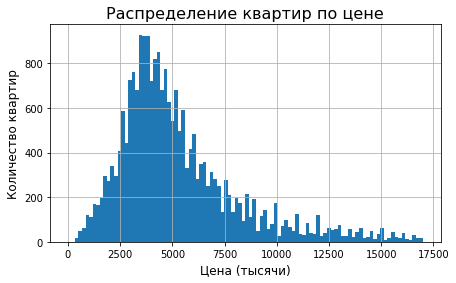

In [58]:
# гистограмма цены квартиры
make_hist(df, 'price_thousands', 100)

Теперь на гистограмме видно, что пик приходится на как раз на цену в 4,5 млн, что практически соответствует медиане. После 12,5 млн. гистограмма имеет длинный хвост, а значит таких предложений мало. Больше всего предложений на рынке по цене от 2 до 7 млн. 

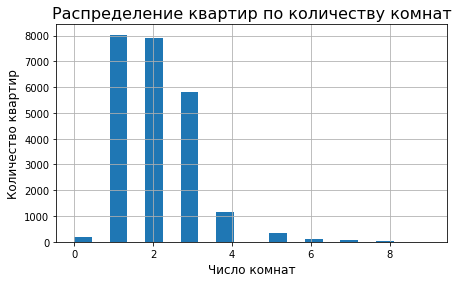

In [59]:
# гистограмма по числу комнат
make_hist(df, 'rooms', 20)

Здесь хорошо видно, что больше всего на рынке недвижимости представлены 1 - 2 комнатные квартиры и немного реже 3 комнатные. И все же средний показатель и медиану составляют 2 комнатные квартиры. Предложения о продаже 4 комнатных квартир встречаются в 8 раз реже, а о продаже квартир, имеющих 0 или 5 и более комнат бывают редко.   

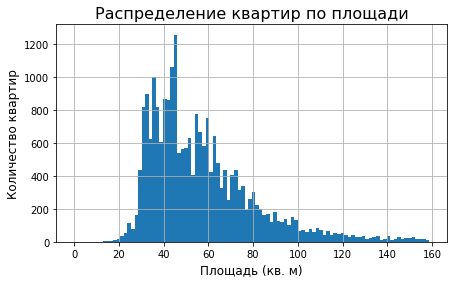

In [60]:
# гистограмма по вплощади
make_hist(df, 'total_area', 100)

На гистограмме хорошо видно, что пик приходится на 43-45 кв. м, так же есть пики поменьше около 35-37 кв. м. Все это наиболее часто встречающиеся предложения. Однако они не соответствуют среднему значению или медиане. Больше всего на рынке представлены квартиры площадью от 30 до 85 квадратных метров.

### Вывод

Можно сделать следующие выводы:
1. На всех гистограммах есть выбросы, от которых нужно будет избавиться.
2. В основном на рынке недвижимости представлены квартиры площадью от 30 до 85 квадратных метров, самое большое количество предложений 35-37 кв. м и 43 - 45 кв. м. Не редко можно встретить предложения до 160 кв. м.
3. Больше всего предложений на рынке квартир по цене от 2 до 7 млн., а пик приходится на цену около 4,5 млн. 
4. В основном на рынке можно встретить 1 - 2 комнатные квартиры и немного реже 3 комнатные, что также подтверждает распределение показателей площади квартир.
5. Чаще всего встречаются квартиры с высотой потолков около от 2,5 до 3 метров. Высота более 3 метров практически не встречается.

### Время продажи квартиры

Изучим время продажи квартиры, чтобы понять, когда можно считать, что продажи прошли очень быстро, а когда необычно долго.

Посмотрим статистическое описание данных и построим гистограмму.

In [61]:
# описание данных о времени продажи
df['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Text(0, 0.5, 'Количество объявлений')

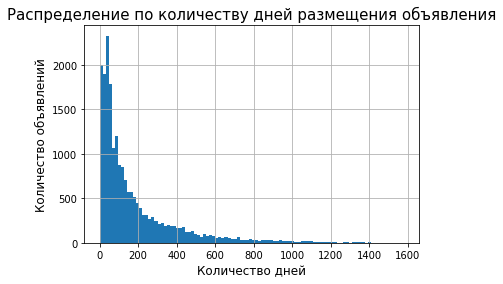

In [62]:
# гистограмма времени продажи квартиры
df.hist(column=['days_exposition'], bins=100)
plt.title('Распределение по количеству дней размещения объявления', fontsize = 15) 
plt.xlabel('Количество дней', fontsize = 12)
plt.ylabel('Количество объявлений', fontsize = 12)

Мы можем наблюдать, что большая часть продаж осуществлялась за период до 400 дней, то есть примерно до года. Гистограмма имеет пик около 50 дней и длинный хвост до 1580 дней. Таким образом максимальное время продажи составило чуть больше 4 лет. Рассмотрим подробнее период продаж до 6 месяцев.

Text(0, 0.5, 'Количество объявлений')

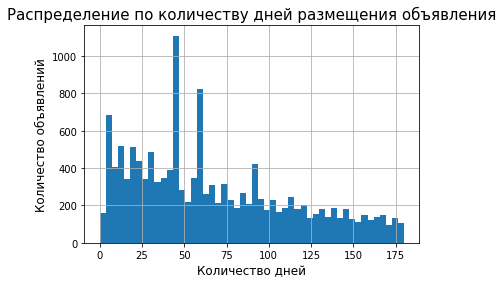

In [63]:
# гистограмма времени продажи квартиры за периода до 180 дней
df.hist(column=['days_exposition'], bins=50, range=(0, 180))
plt.title('Распределение по количеству дней размещения объявления', fontsize = 15) 
plt.xlabel('Количество дней', fontsize = 12)
plt.ylabel('Количество объявлений', fontsize = 12)

На этой гистограмме видно, что чаще всего продажа квартиры занимает 45 дней. Также есть пик в 60 дней и отдельные пики поменьше - 7 и 90 дней. Это наиболее часто встречающиеся показатели. Можно сделать предположение, что объявления могли быть закрыты по истечению определенного срока и без продажи квартиры.    
Среднее время продажи составляет 180 дней, а медиана всего 95 дней. Также данные имеют большое стандартное отклонение в 219 дней, что говорит о разнообразии значений.   
75% продаж осуществлялись за период до 231 дня, тоже самое можно наблюдать и на первой гистограмме. И лишь 25% продаж были осуществлены до 45 дней с момента подачи объявления. 

### Вывод

Можно сделать вывод, что по большей части квартиры продают в период от 1 недели до 240 дней, то есть до 8 месяцев. Таким образом **очень быстрой продажу** можно считать, если она была осуществлена **за 1 неделю и менее**, а **слишком долгой**, если квартиру не могли продать **более 8 месяцев** .   
Также мы заметили, что очень часто встречается показатель времени продажи квартиры от 45 до 60 дней. Оптимальным будем считать 3 месяца, то есть время соответствующее медиане. 

### Отсеивание редких и выбивающихся значений

Используем диаграмму размаха, чтобы посмотреть на  характерный разброс, найти выбросы и определить границы, по которым нужно отсеять редкие значения. 

Построим диаграммы размаха для общей площади квартир, количества комнат, цены и высоты потолков

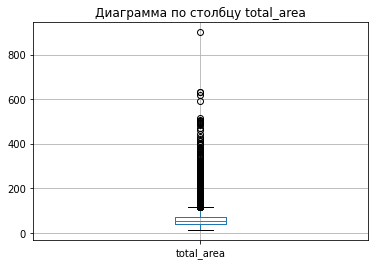

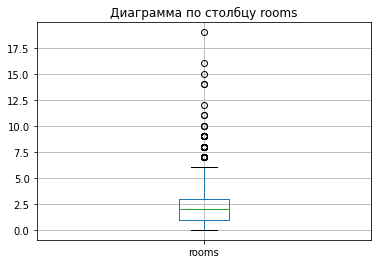

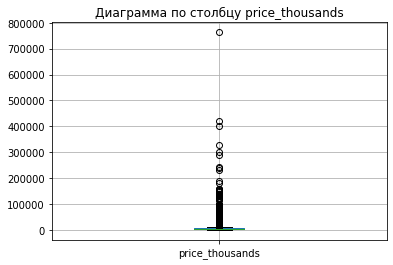

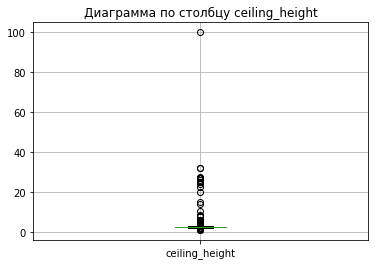

In [64]:
# построение диаграммы размаха для общей площади , количества комнат, цены и высоты потолков
list_of_columns = ['total_area', 'rooms', 'price_thousands', 'ceiling_height']

for column in list_of_columns:
    df.boxplot(column=column)
    plt.title('Диаграмма по столбцу ' + column)
    plt.show()

- На диаграмме общей площади хорошо видно, что в данных присутсвуют множество выбросов от 150 до 500 кв. м и отдельные выбросы около 600 и 900 кв. м. 
- На диаграмме по количеству комнат четко видно, что квартиры с количеством комнат более 6 являются выбросами от которых нужно будет избавиться.
- Диаграмма по цене совершенно не наглядна. Видно, что есть выбросы, в основном от 15 до 200 млн., однако отдельные доходят до 400 и 800 млн. 
- На диаграмме по высоте потолков также трудно что либо рассмотреть. Минимальная высота потолков составляет 1 метр, а максимальная - 100 метров. Выглядит нереалистично. Можно предположить, что пользователи просто совершили опечатку, когда вносили данные о квартирах. 

Чтобы лучше разглядеть верхнюю и нижнюю границы, изменим масштаб графиков.

<AxesSubplot:title={'center':'Диаграмма по столбцу total_area'}>

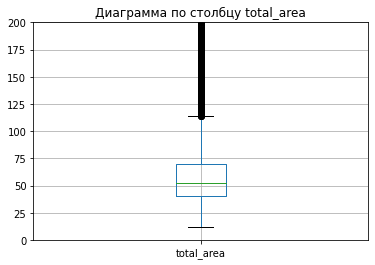

In [65]:
# диаграмма размаха для общей площади до 200 кв. м
plt.ylim(0, 200)
plt.title('Диаграмма по столбцу total_area')
df.boxplot(column=['total_area']) 

Здесь хорошо видно, что "усы" графика находятся в границе от 12 до 120 кв. м. Данные, находящие в этих границах имеют нормальное значение и их можно использовать для анализа.

<AxesSubplot:title={'center':'Диаграмма по столбцу price_thousands'}>

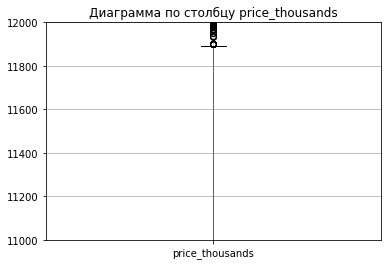

In [66]:
# верхняя граница
plt.ylim(11000, 12000)
plt.title('Диаграмма по столбцу price_thousands')
df.boxplot(column=['price_thousands']) 

<AxesSubplot:title={'center':'Диаграмма по столбцу price_thousands'}>

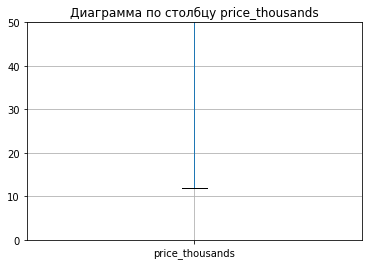

In [67]:
# нижняя граница
plt.ylim(0, 50)
plt.title('Диаграмма по столбцу price_thousands')
df.boxplot(column=['price_thousands']) 

Можно увидеть, что границы усов проходят от 12 до 11900 тыс. Цена в 12 тысяч выглядит неправдоподобно, поэтому не будем ее включать в срез данных. 

<AxesSubplot:title={'center':'Диаграмма по столбцу ceiling_height'}>

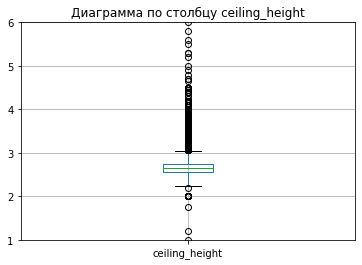

In [68]:
# диаграмма размаха для высоты потолков от 1 до 6 м
plt.ylim(1, 6)
plt.title('Диаграмма по столбцу ceiling_height')
df.boxplot(column=['ceiling_height']) 

По диаграмме размаха видим, что квартир с высотой потолков ниже 2 метров и выше 5 очень мало. Возьмем эти границы, чтобы избавится от выбросов и не потерять слишком много данных.

Сделаем срез данных на основе полученных значений из диаграмм размаха.

In [69]:
# срез данных по границам total_area, rooms и price_thousands
df = df.query('(total_area < 120) and (rooms <= 6) and (12 < price_thousands < 11900) and (2 < ceiling_height < 5)')

In [70]:
# проверка результата
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21423 entries, 1 to 23698
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21423 non-null  int64         
 1   last_price            21423 non-null  int64         
 2   price_thousands       21423 non-null  int64         
 3   total_area            21423 non-null  float64       
 4   square_meter_price    21423 non-null  int64         
 5   first_day_exposition  21423 non-null  datetime64[ns]
 6   rooms                 21423 non-null  int64         
 7   ceiling_height        21423 non-null  float64       
 8   floors_total          21423 non-null  int64         
 9   floor                 21423 non-null  int64         
 10  floor_level           21423 non-null  object        
 11  is_apartment          21423 non-null  bool          
 12  studio                21423 non-null  bool          
 13  open_plan       

Количество строк в таблице снизилось с 23650 до 21423, то есть на 2227 строк, что составляет 9,4%. Это не слишком высокий показатель, а значит мы не потеряли слишком много данных и одновременно смогли очистить их от выбросов.

Посмотрим как изменится числовое описание данных после того, как мы убрали выбросы.

In [71]:
# описание данных
df.describe()

,total_images,last_price,price_thousands,total_area,square_meter_price,rooms,ceiling_height,floors_total,floor,living_area,...,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition
count,21423.000000,2.142300e+04,21423.000000,21423.000000,21423.000000,21423.000000,21423.000000,21423.000000,21423.000000,21423.000000,...,21423.000000,15966.000000,15977.000000,15978.000000,6639.000000,15978.000000,7676.000000,18815.000000,21423.000000,21423.000000
mean,9.683518,4.814384e+06,4814.369789,52.764650,92058.576343,1.916585,2.679652,10.789945,5.896746,29.992126,...,0.590814,28921.535388,15007.278901,0.556015,488.412562,0.706722,531.838458,172.316396,2017.389768,6.400224
std,5.537753,2.190689e+06,2190.681826,17.979224,29540.720967,0.894123,0.194263,6.629648,4.908354,12.826499,...,0.938922,12999.870144,8508.799448,0.763453,327.779422,0.888040,277.174852,210.606302,1.017250,3.490390
min,0.000000,4.300000e+05,430.000000,12.000000,7962.000000,0.000000,2.200000,1.000000,1.000000,2.000000,...,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,16.000000,1.000000,2014.000000,1.000000
25%,6.000000,3.300000e+06,3300.000000,39.000000,74729.000000,1.000000,2.550000,5.000000,2.000000,18.000000,...,0.000000,18039.000000,10658.000000,0.000000,288.000000,0.000000,315.000000,44.000000,2017.000000,3.000000
50%,9.000000,4.400000e+06,4400.000000,49.000000,92715.000000,2.000000,2.650000,9.000000,4.000000,29.000000,...,0.000000,27104.000000,13650.000000,0.000000,456.000000,0.000000,520.500000,91.000000,2017.000000,6.000000
75%,14.000000,5.980000e+06,5980.000000,63.000000,109375.000000,3.000000,2.750000,16.000000,8.000000,38.800000,...,1.000000,37652.000000,16722.000000,1.000000,613.000000,1.000000,741.000000,218.000000,2018.000000,10.000000
max,50.000000,1.189440e+07,11894.000000,119.800000,312240.000000,6.000000,4.700000,60.000000,33.000000,100.000000,...,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,2019.000000,12.000000


Минимальная высота потолков теперь составляет 2,2 метра, а максимальная 4,7 метра. Минимальная цена за квартиру - 430 тысяч. Это выглядит более правдоподобно.  
Также из таблицы видно, что **среднее значение и медиана площади квартир снизилась** с 60 до 52 и с 52 до 49 квадратных метров соответственно. Таким образом среднее значение и медиана не сильно отличаются. Тоже самое мы можем наблюдать и со стоимостью квартиры. **Средняя цена снизилась** с 6,5 млн. до 4,8 млн. и **практически соответствует медиане** в 4,4 млн. А это значит, что наше **распределение стало больше похоже на нормальное распределение**  .   
Проверим эту гипотезу на гистограммах.

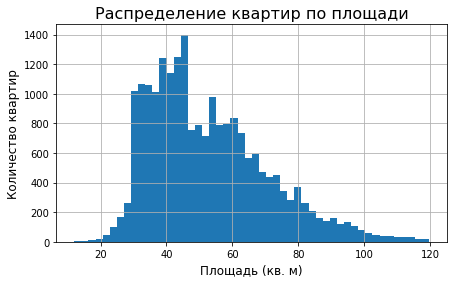

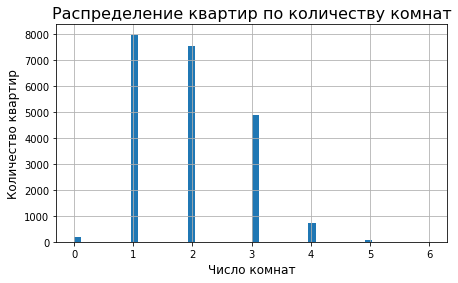

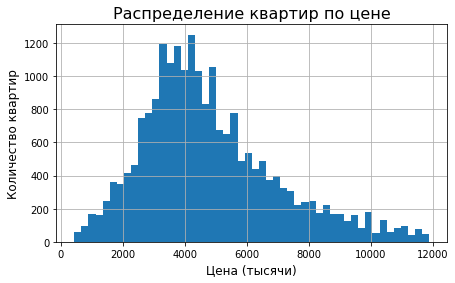

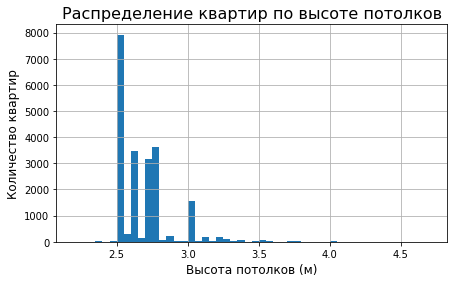

In [72]:
# гистораммы для площади квартиры, цены, числа комнат и высоты потолков
for key in dict_of_columns:
    df.hist(column=key, bins=50, figsize=(7, 4))
    plt.title(dict_titles_list_1[key], fontsize = 16) 
    plt.xlabel(dict_of_columns[key], fontsize = 12)
    plt.ylabel('Количество квартир', fontsize = 12)  

### Вывод

Мы избавились от отдельных выбросов:
- площади квартир свыше 120 квадратных метров
- квартир с количеством комнат более 6
- стоимости квартир в 12 тысяч и более 11 900 тысяч
- высоты потолков менее 2 метров и более 5 метров  
  
Распределение данных теперь больше похоже на нормальное распределение, средние значения и медиана практически соответствуют друг другу.  
  
Теперь можно приступать к анализу стоимости квартир и факторов влияющих на нее.

### Определение факторов, влияющих на стоимость квартиры

Выясним какие факторы больше всего влияют на стоимость квартиры.   
  
Выдвинем и проверим следующие гипотезы: 
1. Предположим, что чем больше площадь и число комнат, тем выше цена за квартиру. А чем дальше квартира находится от центра, тем ниже ее цена.
2. Квартиры, расположенные на первом и последнем этажах самые дешевые.
3. Сделаем предположение, что стоимость квартир ежегодно растет, а вот месяц и день размещения объявления не влияют на стоимость квартиры. 

 **1. Зависимость цены квартиры от площади, числа комнат и удалённости от центра**

Чтобы найти зависимость данных параметров посмотрим на коэффициент корреляции.

In [73]:
# функция для корреляции определенных колонок талблицы
def correlation(data, list_of_col):
    plt.figure(figsize=(15,15))
    plt.title('Матрица корреляций', fontsize = 16)
    return sns.heatmap(data[list_of_col].corr()[list_of_col], annot = True, fmt='.2g', cmap='winter')


In [74]:
# список колонок для корреляции
list_of_column_2 = ['last_price', 'total_area', 'square_meter_price', 'rooms','ceiling_height', 'living_area', 
               'living_area_ratio', 'kitchen_area', 'kitchen_area_ratio', 'airports_nearest', 
               'cityCenters_nearest', 'parks_around3000', 'ponds_around3000', 'balcony', 'is_apartment', 'studio', 'open_plan']

<AxesSubplot:title={'center':'Матрица корреляций'}>

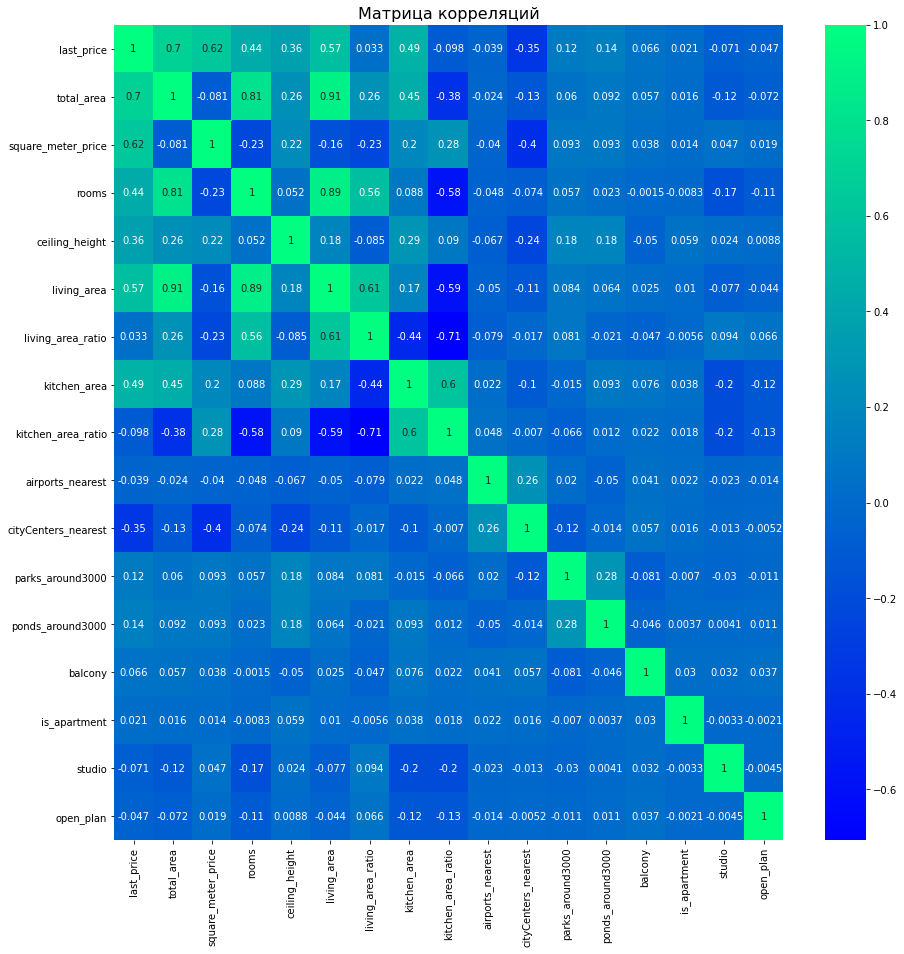

In [75]:
correlation(df, list_of_column_2)

Мы можем наблюдать следующие закономерности:
  
1. Самый большой положительный коэффициент корреляции у цены и:
- площади квартиры 0,7
- количества комнат 0,44
- высоты потолков 0,36
- жилой площади 0,57
- площади кухни 0,49  
А это значит что, чем выше эти показатели, тем больше цена квартиры.   
Высокая зависимость цены от жилой площади и площади кухни также объясняется высоким коэффициентом корреляции жилой площади и площади кухни от общей площади - 0,91 и 0,45 соответственно. Это вполне логично, так как чем больше общая площадь, тем больше площади кухни и жилой. 
Чуть меньше цена квартиры зависит от наличия водоемов и парков, коэффициенты корреляции 0,14 и 0,12 соответственно.
  
2. Самый большой отрицательный коэффициент корреляции у цены и:
- удаленности от центра города -0,35  
Таким образом, чем дальше квартира от центра города тем ниже ее цена.
  
3. Практически не влияет на цену наличие балкона, удаленность от аэропорта, наличие открытой планировки или принадлежность жилого помещения к студии либо апартаментам.  
  
    
4. Наблюдаются небольшие отрицательные коэффициенты корреляции у цены за квадратный метр и общей площади и количества комнат в квартире. Зависимость слабая, но все же можно сказать, что выгоднее покупать квартиры с большей площадью и большим количеством комнат, так как цены за квадратный метр в таких квартирах немного ниже. Так же стоимость квадратного метра квартиры снижается при удалении от центра города. А вот чем больше коэффициент соотношения площади кухни и жилой площади, тем больше цены за квадратный метр. Очевидно большие кухни ценятся.

Чтобы нагляднее представить картину воспользуемся матрицей диаграмм рассеяния.

In [76]:
# выбор колонок для мартицы
matrix_df = df.loc[:, ['price_thousands', 'square_meter_price', 'total_area', 'rooms', 'cityCenters_nearest']]

array([[<AxesSubplot:xlabel='price_thousands', ylabel='price_thousands'>,
        <AxesSubplot:xlabel='square_meter_price', ylabel='price_thousands'>,
        <AxesSubplot:xlabel='total_area', ylabel='price_thousands'>,
        <AxesSubplot:xlabel='rooms', ylabel='price_thousands'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='price_thousands'>],
       [<AxesSubplot:xlabel='price_thousands', ylabel='square_meter_price'>,
        <AxesSubplot:xlabel='square_meter_price', ylabel='square_meter_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='square_meter_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='square_meter_price'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='square_meter_price'>],
       [<AxesSubplot:xlabel='price_thousands', ylabel='total_area'>,
        <AxesSubplot:xlabel='square_meter_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_are

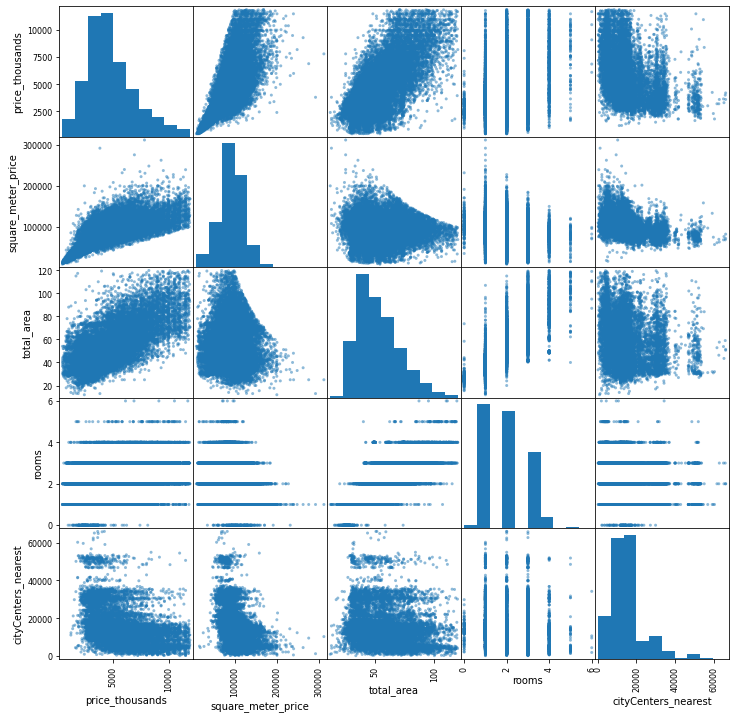

In [77]:
# построение мартицы
pd.plotting.scatter_matrix(matrix_df, figsize=(12, 12)) 

Увидев диаграммы, мы можем подтвердить, что:
- Цена на квартиру растет при увеличении площади и снижается при удалении от центра города. Таким образом и **наша первая гипотеза подтвердилась**.
- Цена за квадратный метр квартиры немного снижается при уменьшении общей площади, количества комнат и при удалении от центра города.

**2. Зависимость цены от того, на каком этаже расположена квартира**

Посмотрим на графике как выглядит изменение цены в зависимости от этажа квартиры.

Text(0.5, 1.0, 'Зависимоcть цены от этажа расположения квартиры')

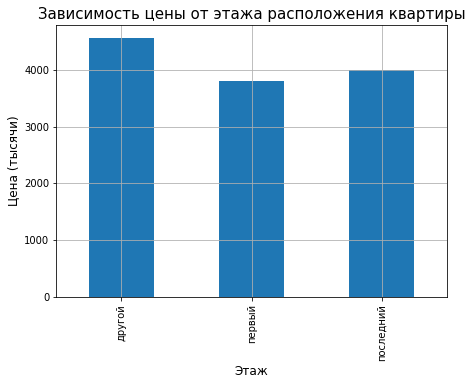

In [78]:
# график зависмости медианы цены квартиры от этажа
(
    df.pivot_table(index='floor_level', values=['price_thousands'], aggfunc=['median'])
    .plot(y = 'median', grid=True, kind='bar', figsize=(7, 5), legend=False)
      
)
plt.xlabel('Этаж', fontsize = 12)
plt.ylabel('Цена (тысячи)', fontsize = 12)  
plt.title('Зависимоcть цены от этажа расположения квартиры', fontsize = 15)

Четко видно, что **самая низка цена** у квартир **на первом этаже**, **цена чуть повышается**, если квартира расположена **на последнем этаже** и **самые дорогие квартиры на других этажах**.

Определим, как меняется медиана общей стоимости квартиры и цены за квадратный метр в зависимости от этажа.

In [79]:
# сводная таблица медианы цены и стоимости кв. м в зависомости от этажа
pivot_table_floor_lenvel = df.pivot_table(index='floor_level',
                                          values=['price_thousands', 'square_meter_price'],
                                          aggfunc=['median', 'count'])
pivot_table_floor_lenvel

median                              count  \
            price_thousands square_meter_price price_thousands   
floor_level                                                      
другой               4557.5            96054.5           15660   
первый               3800.0            80434.0            2753   
последний            4000.0            84615.0            3010   

                                
            square_meter_price  
floor_level                     
другой                   15660  
первый                    2753  
последний                 3010

Мы видим, что **стоимость квартир на последнем этаже ниже в среднем на 12%**, а **на первом этаже в среднем на 16%**. Цена за квадратный метр площади также ниже у квартир на последнем этаже на 11,9% и на первом этаже ниже также на 16%. Кроме того, таких квартир на рынке недвижимости представлено в пять раз меньше.  
  
**Вторая гипотеза также подтвердилась.**

**3. Зависимость цены квартиры от даты размещения**

 Установим зависимость цены квартиры от даты размещения: дня недели, месяца и года.

- Посмотрим, как менялась медиана цены за квартиру по годам

Text(0.5, 1.0, 'Зависимоcть цены квартиры от года подачи объявления')

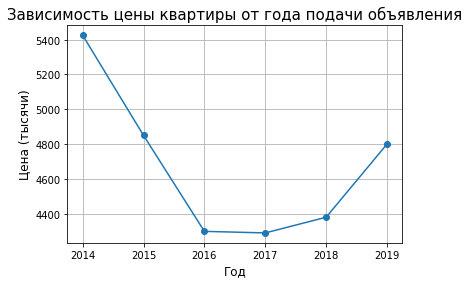

In [80]:
# построение графика зависимости медианы цены от года с помощью сводной таблицы
(
    df.pivot_table(index='year_exposition', values=['price_thousands'], aggfunc=['median'])
    .plot(y = 'median', grid=True, style='o-', legend=False)
)
plt.xlabel('Год', fontsize = 12)
plt.ylabel('Цена (тысячи)', fontsize = 12)  
plt.title('Зависимоcть цены квартиры от года подачи объявления', fontsize = 15)

График довольно наглядно показывает, что **цены на квартиры в 2014 году были максимальными** и составляли в среднем 5,4 млн. Далее медиана цены начала снижаться и достигла **минимума в 2016 - 2017 годах**, составив 4,3 млн. После чего начала плавно расти и к 2019 году достигла уровня 2015 года, однако осталась в среднем на 11% ниже уровня цен 2014 года. 

- Посмотрим, как менялась медиана цены за квартиру по месяцам подачи объявления

Ограничим гистограмму по вертикали медианой цены от 3000 до 4700 тысяч, чтобы разглядеть зависимость. 

Text(0.5, 1.0, 'Зависимоcть цены квартиры от месяца подачи объявления')

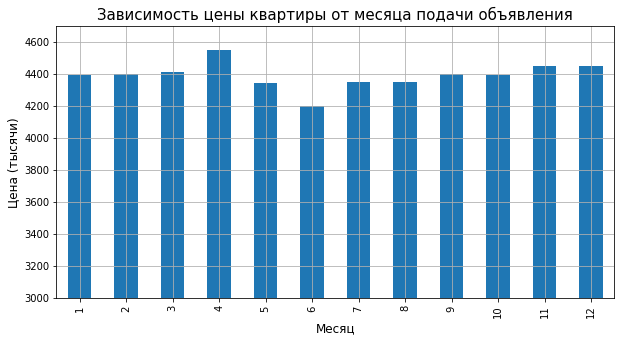

In [81]:
# построение гистограммы зависимости медианы цены от месяца 
(
    df.pivot_table(index='month_exposition', values=['price_thousands'], aggfunc=['median'])
    .plot(y = 'median', grid=True, kind='bar', figsize=(10, 5), ylim=(3000, 4700), legend=False)
)
plt.xlabel('Месяц',  fontsize = 12)
plt.ylabel('Цена (тысячи)', fontsize = 12)  
plt.title('Зависимоcть цены квартиры от месяца подачи объявления', fontsize = 15)

Как видно из гистограммы различия минимальны и варьируются от 4,2 до 4,55 млн. **На медиану цены квартиры практически не влияет месяц размещения объявления о продаже, хотя минимальными остаются показатели с мая по август, а максимальным - апрель.** Возможно это связано с тем, что с мая по август основной период отпусков и люди стараются как можно быстрее продать квартиры и уехать отдыхать в отпуск. 

- Посмотрим, как менялась медиана цены за квартиру по дням подачи объявления

Ограничим гистограмму по вертикали медианой цены от 4000 до 4600 тысяч, чтобы разглядеть зависимость.

Text(0.5, 1.0, 'Зависимоcть цены квартиры от дня подачи объявления')

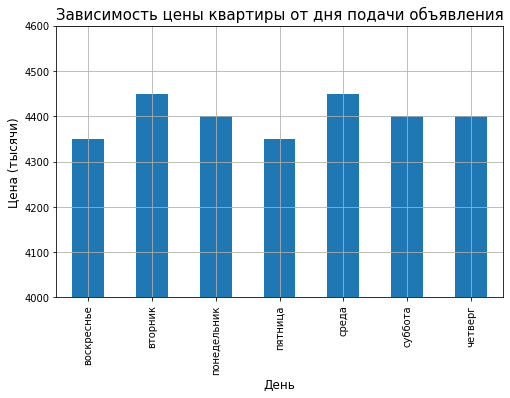

In [82]:
# построение гистограммы зависимости медианы цены от дня недели
(
    df.pivot_table(index='weekday_exposition', values=['price_thousands'], aggfunc=['median'])
    .plot(y = 'median', grid=True, kind='bar', figsize=(8, 5), ylim=(4000, 4600), legend=False)
)
plt.xlabel('День', fontsize = 12)
plt.ylabel('Цена (тысячи)', fontsize = 12)  
plt.title('Зависимоcть цены квартиры от дня подачи объявления', fontsize = 15)

По гистограмме заметно, что различия минимальны и варьируются от 4,35 до 4,45 млн. **На медиану цены квартиры почти не влияет день размещения объявления о продаже.** Минимальные показатели в воскресенье и в пятницу, а максимальные - во вторник и в среду. 

Проанализировав зависимость цены квартиры от даты размещения, можно сказать следующее: 
1. Цены на квартиры в 2014 году были максимальными, и в 2016 - 2017 года минимальными. К 2019 году выросли, но остались в среднем на 11% ниже уровня цен 2014 года. 
2. На медиану цены квартиры почти не влияет месяц размещения объявления о продаже. Минимальными цены остаются с мая по август, а максимальными в апреле. 
3. Цены квартира практически не зависит от дня размещения объявления о продаже. 
  
В это раз наша **гипотеза подтвердилась только частично**. Пик роста цен наблюдался в 2014 году, возможно это было связано с политической ситуацией, падением курса рубля и как следствие увеличением спроса на недвижимость.

### Вывод

Из нашего исследования можно сделать вывод, что:

- С увеличением площади и количества комнат закономерно увеличивается цена за квартиру. Хотя цена за квадратный метр площади слегка снижается.
- Чем дальше квартира находится от центра, тем ниже ее цена.
- Квартиры, расположенные на первом и последнем этажах самые дешевые. В среднем они дешевле на 12-16%.
- Начиная с 2017 года цены на квартиры растут. В период с мая по август недвижимость дешевле в среднем на 1-4%, а в апреле дороже в среднем на 3%. День подачи объявления практически не влияет на цену квартиры. 

### Определение населённых пунктов с самой высокой и низкой стоимостью жилья

Предположим, что в Санкт-Петербурге и ближайших городах самые высокие цены на жилье, а в деревнях и селах наоборот самые низкие. 

Для того, чтобы проверить гипотезу найдем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах.

In [83]:
locations_10 = df['locality_name'].value_counts().head(10) 
locations_10

санкт-петербург      13623
поселок мурино         588
поселок шушары         439
всеволожск             393
пушкин                 337
колпино                335
поселок парголово      326
гатчина                302
деревня кудрово        298
выборг                 230
Name: locality_name, dtype: int64

Мы видим, что больше всего предложений о продаже квартир в Санкт-Петербурге и поселках Мурино и Шушары.

In [84]:
locations_10_name = locations_10.index

In [85]:
# срез данный из таблицы с 10 населенными пунктами с нибольшим количеством объявлений
top_10_locations = df.query('locality_name in @locations_10_name')
top_10_locations.head()

,total_images,last_price,price_thousands,total_area,square_meter_price,first_day_exposition,rooms,ceiling_height,floors_total,floor,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,weekday_exposition
1,7,3350000,3350,40.4,82920,2018-12-04,1,2.75,11,1,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018,12,вторник
2,10,5196000,5196,56.0,92785,2015-08-20,2,2.55,5,4,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015,8,четверг
4,2,10000000,10000,100.0,100000,2018-06-19,2,3.03,14,13,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2018,6,вторник
6,6,3700000,3700,37.3,99195,2017-11-02,1,2.66,26,6,...,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,2017,11,четверг
7,5,7915000,7915,71.6,110544,2019-04-18,2,2.75,24,22,...,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,2019,4,четверг


In [86]:
# сводная таблица средней цены за кв. м в населенных пунктах с наибольшим количеством объявлений
(
top_10_locations
.pivot_table(index='locality_name', values='square_meter_price')
.sort_values(by='square_meter_price', ascending=False).round()
.style.set_caption('Средняя цена за 1 кв. м в населенных пунктах с наибольшим количеством объявлений')
)

,square_meter_price
locality_name,
санкт-петербург,105636.000000
пушкин,100365.000000
деревня кудрово,92409.000000
поселок парголово,90332.000000
поселок мурино,86064.000000
поселок шушары,78666.000000
колпино,75221.000000
гатчина,68675.000000
всеволожск,67284.000000


Можно увидеть, что как и ожидалось цена за квадратный метр площади выше всего в г. Санкт-Петербурге - 105 тыс. за кв. м, г. Пушкине - 100 тыс. за кв. м, деревне Кудрово, поселке Парглово и Мурино. 
- Пушкин - достаточно крупный город с историческим значением, находящийся всего в 25 км от Санкт-Петербурга, с населением более 100 тыс. человек, имеет достаточно развитую экономику и промышленность.
- деревня Кудрово в 2018 году стала городом с населением в 25 тысяч человек. Он настолько близко расположен к Санкт-Петербургу, что до ст. м. "Улица Дыбенко" можно дойти пешком. В городе находятся Икеа и ТЦ МЕГА Дыбенко.
- в поселке Парглово и Мурино есть станции метро "Парнас" и "Девяткино", они так же расположены в непосредственной близости к Санкт-Петербургу.  
  
Наименьшая стоимость жилья в Выборге - 58 тыс. за кв. м, Всеволожске и Гатчине. Эти населенные пункты расположены достаточно далеко от Санкт-Петербурга.

Для наглядного представления того, как меняется средняя цена за квадратный метр площади квартиры, посторим график зависмости цены от местоположения.

(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(-2.0, 0, 'всеволожск'),
  Text(0.0, 0, 'санкт-петербург'),
  Text(2.0, 0, 'деревня кудрово'),
  Text(4.0, 0, 'поселок мурино'),
  Text(6.0, 0, 'колпино'),
  Text(8.0, 0, 'всеволожск'),
  Text(10.0, 0, '')])

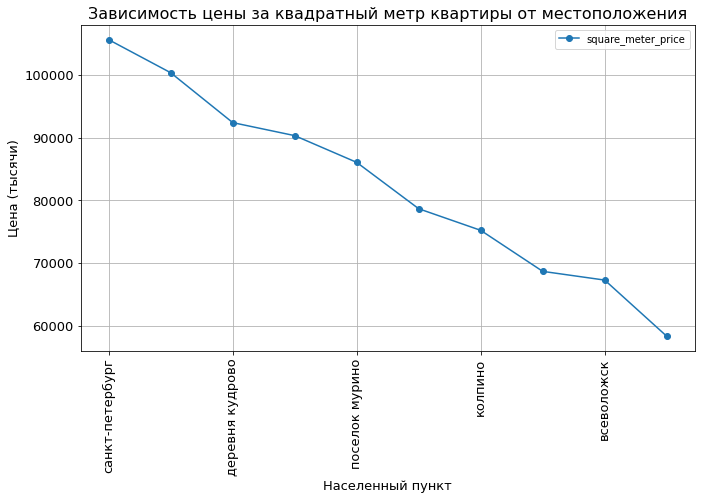

In [87]:
# построение гистограммы зависимости медианы цены от местоположения
(
top_10_locations
    .pivot_table(index='locality_name', values='square_meter_price')
    .sort_values(by='square_meter_price', ascending=False).round()
    .plot(grid=True, style='o-', figsize=(11, 6), fontsize = 13)
)
plt.xlabel('Населенный пункт', fontsize = 13)
plt.ylabel('Цена (тысячи)', fontsize = 13)  
plt.title('Зависимоcть цены за квадратный метр квартиры от местоположения', fontsize = 16)
plt.xticks(rotation=90)

Хорошо видно, как снижается средняя цена за квадратный метр площади от квартир Санкт-Петербурга до квартир, расположенных в более удаленых пунктах: Гатчина, Всеволожск и Выборг.

### Вывод

На стоимость цены за квадратный метр больше влияет непосредственная близость населенных пунктов к Санкт-Петербургу. Стоимость жилья в г. Санкт-Петербурге и г. Пушкине самая высокая - более 100 тыс. за квадратный метр площади. В Выборге самая низкая цена за квадратный метр, она почти в 2 раза ниже стоимости жилья в Санкт-Петербурге.   
Также большего всего предложений о продаже квартир было в Санкт-Петербурге - 13623, а меньше всего в Выборге - 230.

### Анализ предложений квартир в Санкт-Петербурге

- **Выделим квартиры в Санкт-Петербурге и определим, какая область входит в центр. Построим график зависимости цены от удалённости от центра.**

Для начала сделаем срез данных в таблице по городу Санкт-Петербургу.

In [88]:
df_spb = df.query('locality_name == "санкт-петербург"').copy()

У нас оставались пропущенные значения в столбце с информацией об удаленности от центра.

In [89]:
print('Количество пропущенных значений:', df_spb['cityCenters_nearest'].isnull().sum())

Количество пропущенных значений: 41


Это составляет всего 0,3% от всех данных. Удалим эти сроки.

In [90]:
# удаление строк с прощенным значением в столбце cityCenters_nearest
df_spb.dropna(subset=['cityCenters_nearest'], inplace=True)

In [91]:
# проверка
print('Количество пропущенных значений:', df_spb['cityCenters_nearest'].isnull().sum())

Количество пропущенных значений: 0


Переведем расстояние до центра в километры и добавим в таблицу.

In [92]:
# расстояние до центра в км
df_spb['cityCenter_distance_km'] = (df_spb['cityCenters_nearest'] / 1000).astype('int')
df_spb.head()

,total_images,last_price,price_thousands,total_area,square_meter_price,first_day_exposition,rooms,ceiling_height,floors_total,floor,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,weekday_exposition,cityCenter_distance_km
2,10,5196000,5196,56.0,92785,2015-08-20,2,2.55,5,4,...,13933.0,1.0,90.0,2.0,574.0,558.0,2015,8,четверг,13
4,2,10000000,10000,100.0,100000,2018-06-19,2,3.03,14,13,...,8098.0,2.0,112.0,1.0,48.0,121.0,2018,6,вторник,8
7,5,7915000,7915,71.6,110544,2019-04-18,2,2.75,24,22,...,11634.0,0.0,NaN,0.0,NaN,NaN,2019,4,четверг,11
9,18,5400000,5400,61.0,88524,2017-02-26,3,2.50,9,7,...,15008.0,0.0,NaN,0.0,NaN,289.0,2017,2,воскреснье,15
10,5,5050000,5050,39.6,127525,2017-11-16,1,2.67,12,3,...,13878.0,1.0,310.0,2.0,553.0,137.0,2017,11,четверг,13


Пострим график зависимости средней цены квартиры от удаленности от центра города.

Text(0.5, 1.0, 'Зависимоcть средней стоимости квартиры от удаленности от центра города')

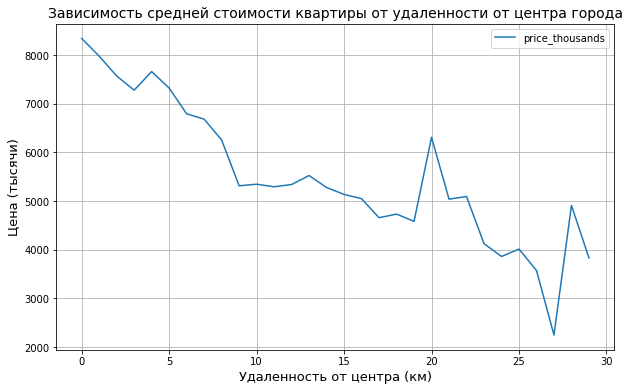

In [93]:
# график зависмости средней цены квартиры от удаленности от центра города
df_spb.pivot_table(index='cityCenter_distance_km', values='price_thousands', aggfunc='mean').plot(grid=True, figsize=(10, 6))
plt.xlabel('Удаленность от центра (км)', fontsize = 13)
plt.ylabel('Цена (тысячи)', fontsize = 13)  
plt.title('Зависимоcть средней стоимости квартиры от удаленности от центра города', fontsize = 14)

Видно, что цена варьируется от 8,4 млн. до 2,4 млн. Наблюдается сильное падение на отрезке до 9 км, далее цена постепенно снижается до 19 км. Далее есть подъемы и падения цены, однако общая тенденция к снижению цен при удаленности от центра. Рассмотрим подробнее участок от 0 до 10 км. 

Text(0.5, 1.0, 'Зависимоcть средней стоимости квартиры от удаленности от центра города')

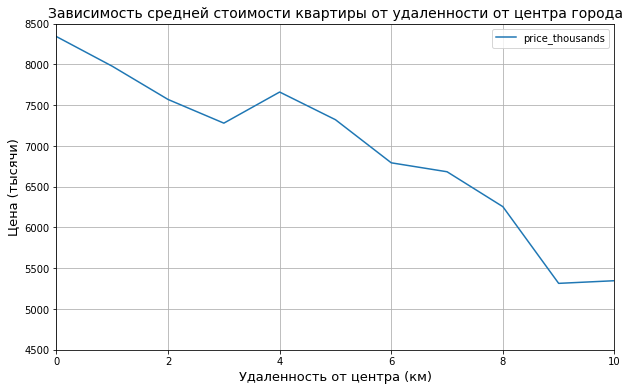

In [94]:
# график зависмости средней цены квартиры от удаленности от центра города на участке от 0 до 10 км
(
   df_spb
   .pivot_table(index='cityCenter_distance_km', values='price_thousands', aggfunc='mean')
   .plot(grid=True, xlim=(0, 10), ylim=(4500, 8500),  figsize=(10, 6))
)    
plt.xlabel('Удаленность от центра (км)', fontsize = 13)
plt.ylabel('Цена (тысячи)', fontsize = 13)  
plt.title('Зависимоcть средней стоимости квартиры от удаленности от центра города', fontsize = 14)

Первые 4 км цена снизилась на 800 тысяч. Следующие 4 км еще на 1300 тысяч. Можно сказать, что в целом цена снижалась по 262,5 тысяч на каждый километр. Затем происходит резкое снижение на отрезке 8 - 9 км с 6300 до 5400 тысяч, то есть почти на 900 тысяч за 1 километр. Далее происходит плавное снижение цены в течение еще 10 километров.

Таким образом будем считать **центральной зоной территорию от 0 до 8 км включительно**, так как после идет уже резкое изменение графика.

- **Проанализируем квартиры в центре Санкт-Петербурга. Изучим площадь квартир, цену, число комнат и высоту потолков.**

Добавим в таблицу столбец, в котором квартиры в радиусе до 8 км включительно будет относится к центру Санкт-Петербурга, а остальные будут относится просто к Санкт-Петербургу.

In [95]:
# создание столбца с принадлежность к центру и присвоение ему значений санкт-петербург
df_spb['center_or_spb'] = df_spb['locality_name']

In [96]:
# замена значений на "центр сантк-петербурга" для квартир в радиусе до 8 км вкл
df_spb['center_or_spb'] = df_spb['center_or_spb'].where(df_spb['cityCenter_distance_km'] > 8, 'центр санкт-петебурга')
df_spb.head()

,total_images,last_price,price_thousands,total_area,square_meter_price,first_day_exposition,rooms,ceiling_height,floors_total,floor,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,weekday_exposition,cityCenter_distance_km,center_or_spb
2,10,5196000,5196,56.0,92785,2015-08-20,2,2.55,5,4,...,1.0,90.0,2.0,574.0,558.0,2015,8,четверг,13,санкт-петербург
4,2,10000000,10000,100.0,100000,2018-06-19,2,3.03,14,13,...,2.0,112.0,1.0,48.0,121.0,2018,6,вторник,8,центр санкт-петебурга
7,5,7915000,7915,71.6,110544,2019-04-18,2,2.75,24,22,...,0.0,NaN,0.0,NaN,NaN,2019,4,четверг,11,санкт-петербург
9,18,5400000,5400,61.0,88524,2017-02-26,3,2.50,9,7,...,0.0,NaN,0.0,NaN,289.0,2017,2,воскреснье,15,санкт-петербург
10,5,5050000,5050,39.6,127525,2017-11-16,1,2.67,12,3,...,1.0,310.0,2.0,553.0,137.0,2017,11,четверг,13,санкт-петербург


In [97]:
# срез данных по квартирам в центре СПб
df_spb_center = df_spb.query('center_or_spb == "центр санкт-петебурга"')

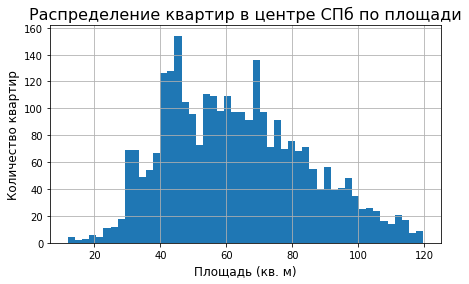

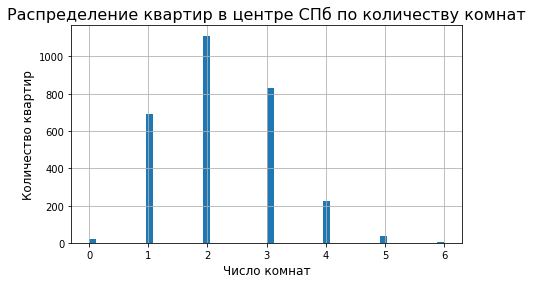

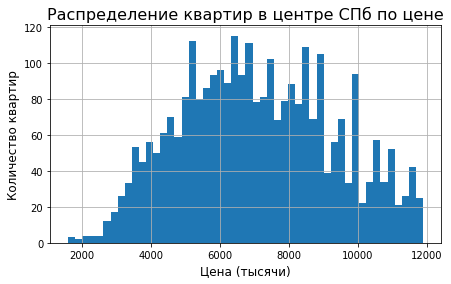

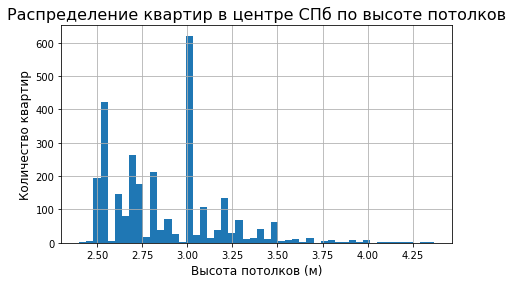

In [98]:
# гистораммы для центра СПб  по площади квартиры, цены, числа комнат и высоты потолков
df_titles_list_2 = ['Распределение квартир в центре СПб по площади', 'Распределение квартир в центре СПб по количеству комнат', 
                  'Распределение квартир в центре СПб по цене', 'Распределение квартир в центре СПб по высоте потолков']
i=0
for key in dict_of_columns:
    df_spb_center.hist(column=key, bins=50, figsize=(7, 4))
    plt.title(df_titles_list_2[i], fontsize = 16) 
    plt.xlabel(dict_of_columns[key], fontsize = 12)
    plt.ylabel('Количество квартир', fontsize = 12)
    i += 1

- В центре Санкт-Петербурга больше всего предложений квартир с высотой потолков 2,6 и 3 метра. Минимальное значение 2,5 метра. Квартир с высотой свыше 3,5 метров очень мало, однако встречаются квартиры, доходящие почти до 4,5 метров.   

  
- В основном квартиры в центре Санкт-Петербурга стоят от 4 до 9 млн. Также часто встречаются предложения по 10 млн. Можно встретить на рынке и квартиры стоимостью 1,6 - 2,7 млн, но таких крайне мало. Максимальная стоимость квартир составляет почти 12 млн.  
  
    
- Много предложения 1 и 3 комнатных квартир, но чаще всего продают 2-комнатные. Практически не встречаются 5-6 комнатные.   
  
    
- В основном жилые помещения имеют площадь от 30 до 85 квадратных метров. Много предложений квартир с площадью 40-45 кв м и 70 кв. м. Также можно найти квартиры площадью до 120 кв. м, а вот менее 30 кв. м встречаются реже.

- **Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)**

Создадим и объединим сводные таблицы, в которых рассчитаем медиану стоимости квартир по Санкт-Петербургу и его центру.

In [99]:
# функция создания и объединения сводных таблиц с медианой стоимости по всему Спб и его центру 
def pivot_tables_spb_and_center(column):
    median_spb = df_spb.pivot_table(index=column, values=['price_thousands'], aggfunc=['median'])
    median_spb.columns = ['санкт-петербург']
    median_spb_center = df_spb_center.pivot_table(index=column, values=['price_thousands'], aggfunc=['median'])
    median_spb_center.columns = ['центр санкт-петербурга']
    median_spb_full = median_spb.join(median_spb_center)
    return median_spb_full

In [100]:
# вызов функции
room_spb_full = pivot_tables_spb_and_center('rooms')
floor_spb_full = pivot_tables_spb_and_center('floor_level')
distance_spb_full = pivot_tables_spb_and_center('cityCenter_distance_km')
year_spb_full = pivot_tables_spb_and_center('year_exposition')
month_spb_full = pivot_tables_spb_and_center('month_exposition')
weekday_spb_full = pivot_tables_spb_and_center('weekday_exposition')

Из сводных таблиц построим гистограммы зависимости стоимость квартиры от числа комнат, этажа, удалённости от центра и даты размещения объявления.

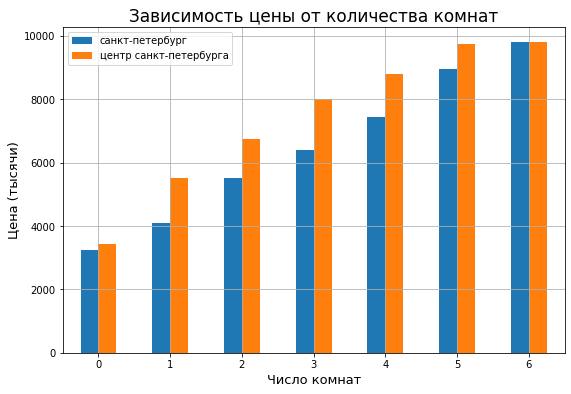

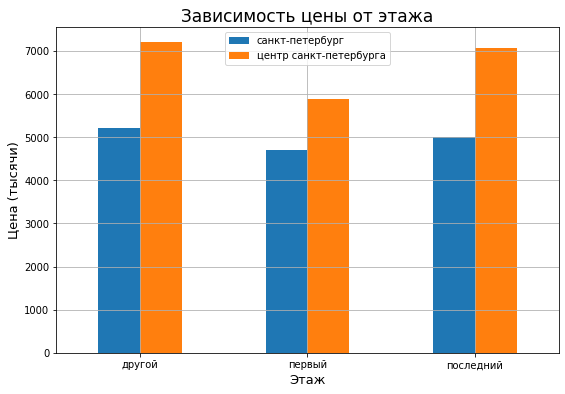

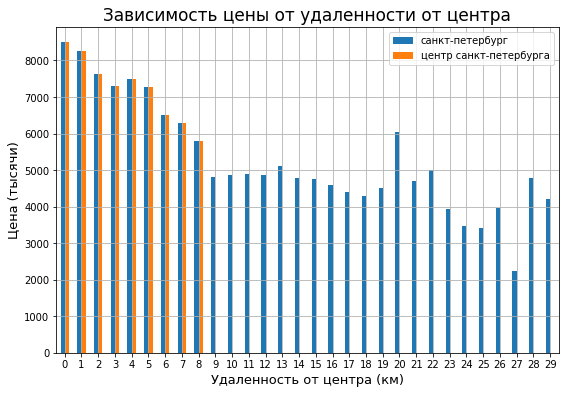

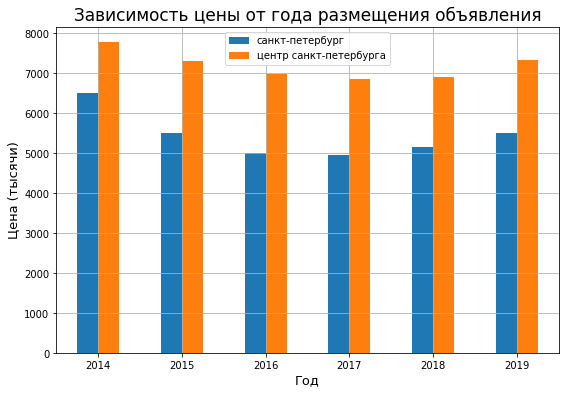

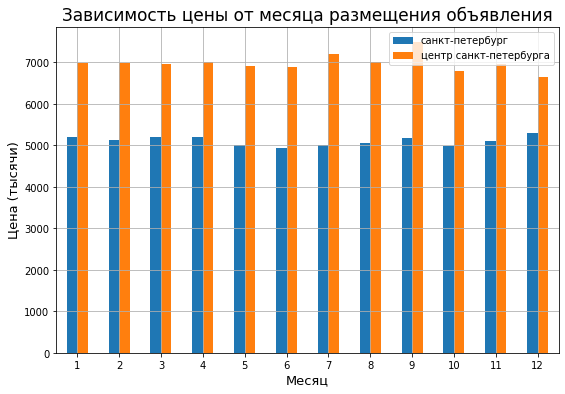

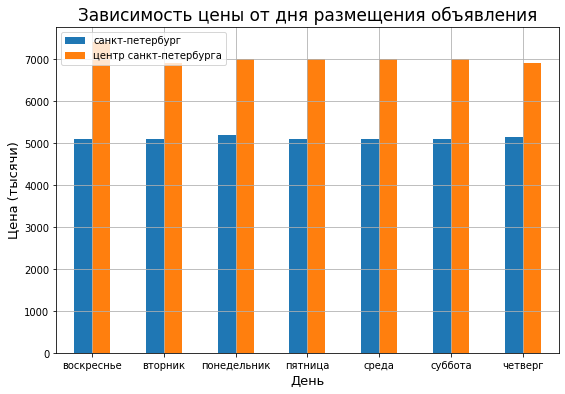

In [101]:
# построение гисторамм 
list_of_tables = [room_spb_full, floor_spb_full, distance_spb_full, year_spb_full, month_spb_full, weekday_spb_full]
list_of_name_xlabel = ['Число комнат', 'Этаж', 'Удаленность от центра (км)', 'Год', 'Месяц', 'День']

df_titles_list_3 = ['Зависимость цены от количества комнат', 'Зависимость цены от этажа', 
                   'Зависимость цены от удаленности от центра', 'Зависимость цены от года размещения объявления', 
                   'Зависимость цены от месяца размещения объявления', 'Зависимость цены от дня размещения объявления']
i=0
for table in list_of_tables: 
    table.plot.bar(rot=0, grid=True, figsize=(9, 6))
    plt.title(df_titles_list_3[i], fontsize = 17)
    plt.xlabel(list_of_name_xlabel[i], fontsize = 13)
    plt.ylabel('Цена (тысячи)', fontsize = 13)
    i += 1    

1. Зависимость цены от количества комнат:
- С увеличением числа комнат увеличивается стоимость квартиры как во всем городе, так в центре, что вполне логично, так как увеличивается общая площадь квартиры. 
- Стоимость квартир вне зависимости от количества комнат в центре города выше, чем во всем городе, за исключением 6-комнатных квартир. Они стоят одинаково, как в центре города, так и во всем городе. Возможно это связано с тем, что таких квартир выставляется крайне мало. 
2. Зависимость цены от этажа квартиры:
- Во всем городе квартиры расположенные на первом этаже самые дешевые, чуть дороже квартиры на последнем этаже и еще немного дороже квартиры на других этажах.
- В центре города сильнее заметна разница между стоимостью квартир на первом этаже и на всех остальных, а вот разница в стоимости квартир на последнем этаже и на других этажах минимальна. 
3. Зависимость цены от удаленности от центра:
- Как в центральной зоне города, так и во всем Санкт-Петербурге, чем дальше квартира расположена от центра города, тем ниже ее стоимость. Однако можно наблюдать интересный факт: квартиры, расположенные в 20км от города настолько же дорогие как и в 7-8 км от центра. Вероятно, там находятся элитные спальные районы.
4. Зависимость цены от года размещения объявления:
- Во всем городе, как и в центре можно наблюдать картину, характерную для все области. В 2014 году был пик цен на недвижимость, который снизился в 2016 - 2017 годах и постепенно вырос в 2019 году до уровня цен 2015 года.
5. Зависимость цены от месяца размещения объявления:
- Во всем городе наблюдается волнообразное изменение цен с минимальной разницей. Самые низкие цены с мая по июль и в октябре, наиболее высокие с декабря по январь, с марта по апрель и в сентябре.
- В центре города не наблюдается волнообразности, и можно выделить два месяца в году с наиболее высокими ценами - это июль и сентябрь, и два месяца с самыми низкими ценами - октябрь и декабрь.
6. Практически не прослеживается, либо минимальна зависимость цены на квартиру от дня размещения объявления в Санкт-Петербурге, однако в центре города объявления, поданные в воскресенье имеют самую высокую стоимость. 

 Чтобы найти линейные взаимосвязи параметров в центральном районе города, а также сравнить их с данными по всему городу посмотрим на матрицы коэффициентов корреляции.

<AxesSubplot:title={'center':'Матрица корреляций для центра Санкт-Петербурга'}>

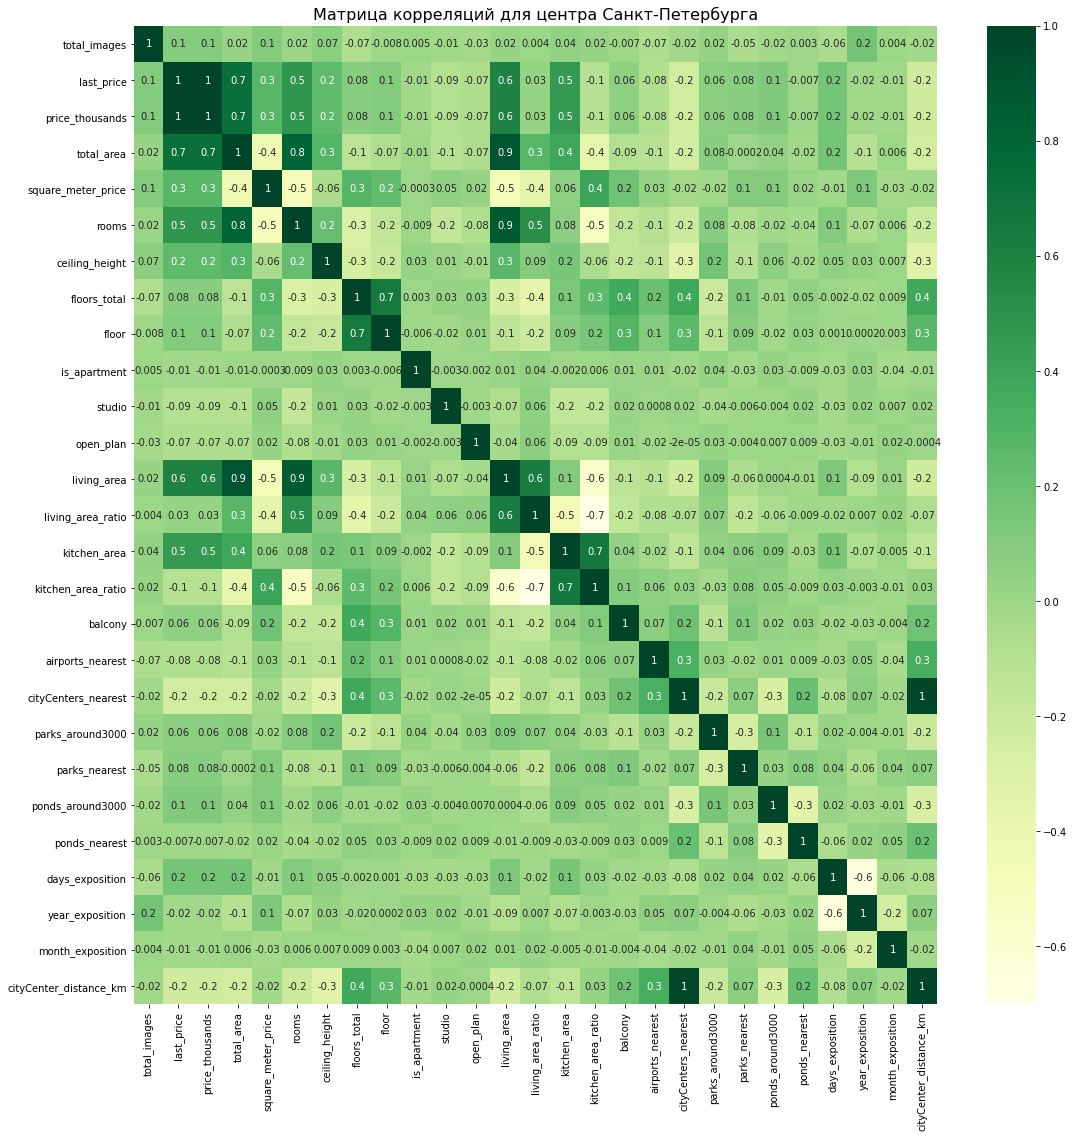

In [102]:
plt.figure(figsize=(18,18))
plt.title('Матрица корреляций для центра Санкт-Петербурга', fontsize = 16)
sns.heatmap(df_spb_center.corr(), annot = True, fmt='.1g', cmap='YlGn')

Мы можем наблюдать следующие закономерности:
  
1. Самый большой положительный коэффициент корреляции у цены и:
- площади квартиры 0,7
- количества комнат 0,5
- жилой площади 0,6
- площади кухни 0,5   
А это значит что, чем выше эти показатели, тем больше цена квартиры.   
Высокая зависимость цены от жилой площади и площади кухни также объясняется высоким коэффициентом корреляции жилой площади и площади кухни от общей площади: 0,9 и 0,4 соответственно. Это вполне логично, так как чем больше общая площадь, тем больше площади кухни и жилой. 
  
2. Есть отрицательный коэффициент корреляции у цены и:
- удаленности от центра города -0,2  
Таким образом, чем дальше квартира от центра города тем ниже ее цена. 
  
3. Слабо влияет на цену наличие балкона, удаленность от аэропорта, наличие парков или водоемов, наличие открытой планировки или принадлежность жилого помещения к студии либо апартаментам.  
  
    
4. Наблюдаются небольшие отрицательные коэффициенты корреляции у цены за квадратный метр и общей площади и количества комнат в квартире: -0,4 и -0,5 соответственно.  Зависимость слабая, но все же можно сказать, что выгоднее покупать квартиры с большей площадью и большим количеством комнат, так как цены за квадратный метр в таких квартирах немного ниже. А вот чем больше коэффициент соотношения площади кухни и жилой площади, тем больше цены за квадратный метр, коэффициент корреляции 0,4. 

<AxesSubplot:title={'center':'Матрица корреляций для всего г. Санкт-Петербурга'}>

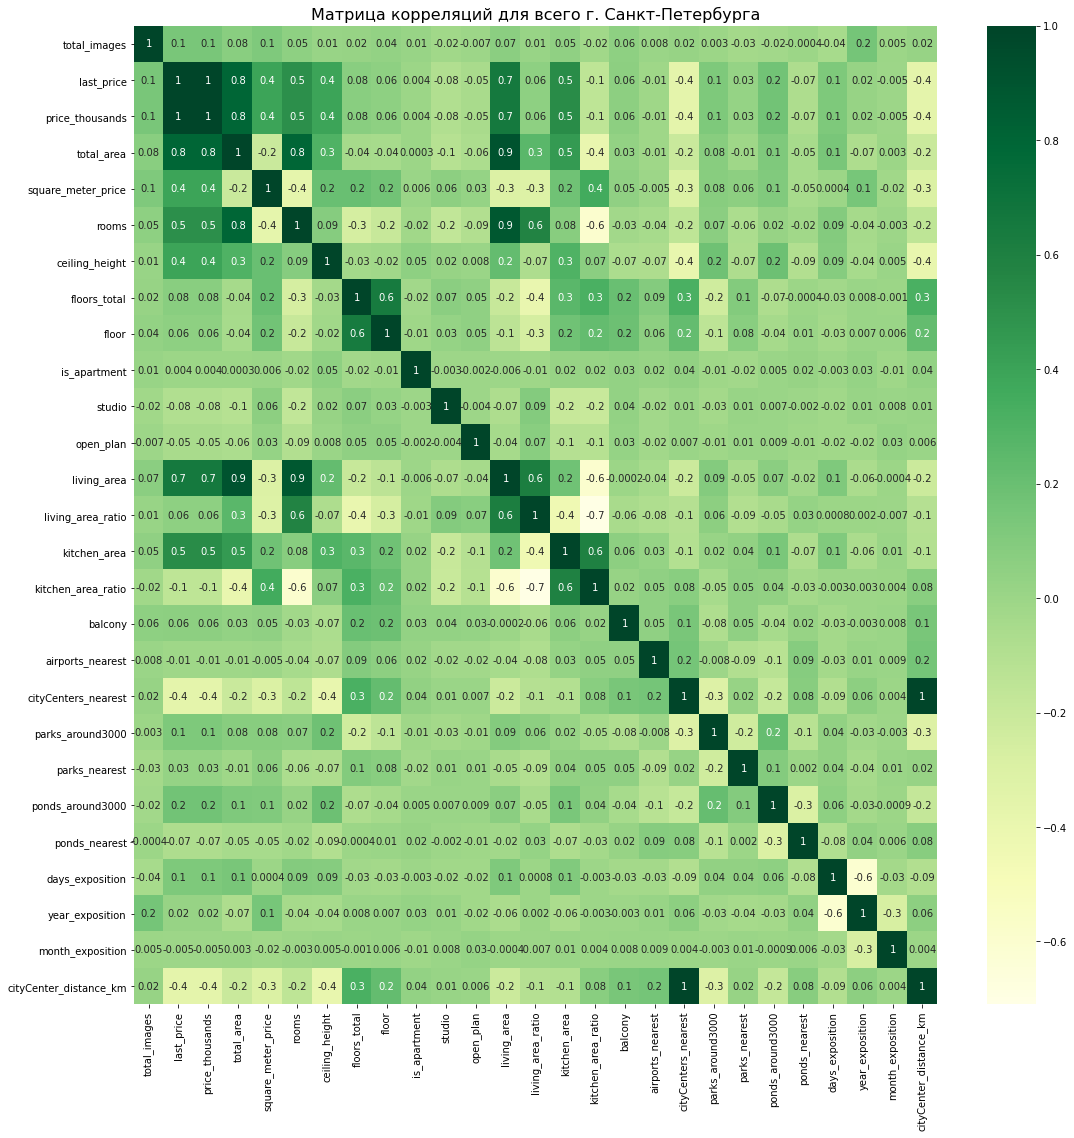

In [103]:
plt.figure(figsize=(18,18))
plt.title('Матрица корреляций для всего г. Санкт-Петербурга', fontsize = 16)
sns.heatmap(df_spb.corr(), annot = True, fmt='.1g', cmap='YlGn')

Мы можем наблюдать следующие закономерности:
  
1. Самый большой положительный коэффициент корреляции у цены и:
- площади квартиры 0,8 - чуть выше, чем в центре города
- количества комнат 0,5
- жилой площади 0,7 - чуть выше, чем в центре города
- площади кухни 0,5 
- высоты потолков 0,4 - выше, чем в центре города
  
2. Есть отрицательный коэффициент корреляции у цены и:
- удаленности от центра города -0,4 - выше, чем в центре города   
  
3. Также слабо влияет на цену наличие балкона, удаленность от аэропорта, наличие открытой планировки или принадлежность жилого помещения к студии либо апартаментам. А вот наличие парков и водоемов чуть больше влияет на увеличение цены во всем городе, чем в центре города. 
  
    
4. Чуть меньше отрицательные коэффициенты корреляции у цены за квадратный метр и общей площади и количества комнат в квартире: -0,2 и -0,4 соответственно.  Зависимость слабая, но все же можно сказать, что выгоднее покупать квартиры с большей площадью и большим количеством комнат, так как цены за квадратный метр в таких квартирах немного ниже. А вот чем больше коэффициент соотношения площади кухни и жилой площади, тем больше цены за квадратный метр, коэффициент корреляции 0,4. Так же стоимость квадратного метра квартиры снижается при удалении от центра города,  коэффициент корреляции -0,3, такой зависимости практически не выражено в центре города.

### Вывод

Можно сделать вывод, что факторы наиболее влияющие на стоимость квартир в центре Санкт-Петербурга и во всем городе схожи:
- Чем больше комнат в квартире, тем выше ее цена.
- Квартиры на первом и последнем этаже самые дешевые.
- Чем ближе к центру, тем, дороже квартира.
- Цены на квартиры были самыми низкими в 2016-2017 года и постепенно растут.
- Цены на квартиры практически не зависят от дня размещения объявления на продажу.
- Общая площадь квартиры, а также соотношение площади кухни к общей также важные показатели, влияющие на увеличение цены квартиры.
- Цены за квадратный метр площади квартиры немного снижаются при увеличении общей площади и количества комнат. 
- Наличие балкона, удаленность от аэропорта, наличие открытой планировки или принадлежность жилого помещения к студии либо апартаментам довольно слабо влияют на цену квартиры.
  
Однако есть ряд важных различий между центром Санкт-Петербурга и и всем городом:
- Различия в ценах на квартиры на последнем и других этажах в центре города минимальна. 
- Цены на квартиры, расположенные в 20 км от центра такие же как и в центре города в радиусе 7-8 км.
- В период с мая по июль цены ниже по всему городу, в то время как в центре города в июле одни из самых высоких цен. В сентябре цены на жилье в центре резко растут, а в октябре остаются снижаются как в городе, так и в центре.
- Во всем городе ярче выражена взаимосвязь цены за квадратный метр площади от удаленности от центра города, коэффициент корреляции -0,3. В то время как, такая зависмость слабее наблюдается в центре города.
- Высота потолков сильнее влияет на увеличениы цены за квартиру во всем городе, а не в центре.
- Наличие парков и водоемов чуть больше влияет на увеличение цены во всем городе, чем в центре города, что вероятно связано с тем, что людям живущих в спальных районах города важно наличие парков или водоемов для прогулок.

## Общий вывод

**1. Обзор рынка недвижимости:**  
  
- В основном на рынке недвижимости представлены квартиры площадью от 30 до 85 квадратных метров, самое большое количество предложений 35-37 кв. м и 43 - 45 кв. м. Не редко можно встретить предложения до 160 кв. м.
- Больше всего предложений квартир по цене от 2 до 7 млн., а пик приходится на цену около 4,5 млн.
- В основном на рынке можно встретить 1 - 2 комнатные квартиры и немного реже 3 комнатные.
- Чаще всего встречаются квартиры с высотой потолков около от 2,5 до 3 метров. Высота более 3 метров встречается редко.

**2. Обзор времени продажи квартир:** 
- По большей части квартиры продают в период от 1 недели до 240 дней, то есть до 8 месяцев. 
- Очень быстрой продажу можно считать, если она была осуществлена за 1 неделю и менее.
- Слишком долгая продажа, если квартиру не могли продать более 8 месяцев. 
- Очень часто встречается показатель времени продажи квартиры от 45 до 60 дней. Оптимальным временем продажи можно считать 3 месяца.

**3. Факторы, влияющие на цену квартиры:**  
  
- Чем выше площадь и количество комнат, тем выше цена за квартиру. Однако цена за квадратный метр площади наоборот немного снижается при увеличении площади и количества комнат. Следовательно, можно сказать, что выгоднее покупать квартиры с большей площадью и количеством комнат.
- Чем дальше квартира находится от центра, тем ниже ее цена.
- Квартиры, расположенные на первом и последнем этажах самые дешевые. В среднем они дешевле на 12-16%.
- Чем больше коэффициент соотношения площади кухни и жилой площади, тем дороже квартира.
- Начиная с 2017 года цены на квартиры растут. В период с мая по август недвижимость дешевле в среднем на 1-4%, а в апреле дороже в среднем на 3%. День подачи объявления практически не влияет на цену квартиры.
- Практически не влияют на цену квартиры наличие балкона, удаленность от аэропорта, наличие открытой планировки или принадлежность жилого помещения к студии либо апартаментам.

**4. Обзор цен на квартиры в населенных пунктах с самым большим количеством предложений:**
- На стоимость цены за квадратный метр однозначно влияет непосредственная близость населенных пунктов к Санкт-Петербургу. 
- Стоимость жилья в г. Санкт-Петербурге и г. Пушкине самая высокая - более 100 тыс. за квадратный метр площади. 
- В Выборге самая низкая цена за квадратный метр, она почти в 2 раза ниже стоимости жилья в Санкт-Петербурге.
- Большего всего предложений о продаже квартир в Санкт-Петербурге - 13623, а меньше всего в Выборге - 230.

**5. Обзор рынка недвижимости в центре Санкт-Петербурга:**
  
- В центре Санкт-Петербурга больше всего предложений квартир с высотой потолков 2,6 и 3 метра. Минимальное значение 2,5 метра. Квартир с высотой свыше 3,5 метров очень мало, однако встречаются квартиры доходящие почти до 4,5 метров.   

  
- В основном квартиры в центре стоят от 4 до 9 млн. Также часто встречаются предложения по 10 млн. Можно встретить на рынке и квартиры стоимостью 1,6 - 2,7 млн, но таких крайне мало. Максимальная стоимость квартир составляет почти 12 млн.  
  
    
- Много предложения 1 и 3 комнатных квартир, но чаще всего продают 2-комнатные. Практически не встречаются 5-6 комнатные.   
  
    
- В основном жилые помещения имеют площадь от 30 до 85 квадратных метров. Много предложений квартир с площадью 40-45 кв м и 70 кв. м. Также можно найти квартиры площадью до 120 кв. м, а вот менее 30 кв. м встречаются реже.

**6. Факторы, влияющие на стоимость квартир в Санкт-Петербурге и его центре:**

- Чем больше комнат в квартире, тем выше ее цена.
- Квартиры на первом и последнем этаже самые дешевые. Однако в центре города разница в ценах на квартиры на последнем и других этажах минимальна.
- Чем ближе к центру, тем, дороже квартира, но цены на квартиры, расположенные в 20 км от центра такие же как и в центре города в радиусе 7-8 км.
- Цены на квартиры были самыми низкими в 2016-2017 года и постепенно растут.
- В период с мая по июль цены ниже по всему городу, в то время как в центре города в июле одни из самых высоких цен. В сентябре цены на жилье в центре резко растут, а в октябре остаются снижаются как в городе, так и в центре.
- Цены на квартиры практически не зависят от дня размещения объявления на продажу.
- Общая площадь квартиры, а также соотношение площади кухни к общей влияет на увеличение цены квартиры.
- Цены за квадратный метр площади квартиры немного снижаются при увеличении общей площади и количества комнат. 
- Наличие балкона, удаленность от аэропорта, наличие открытой планировки или принадлежность жилого помещения к студии либо апартаментам довольно слабо влияют на цену квартиры.
- Высота потолков сильнее влияет на увеличениы цены за квартиру во всем городе, а не в центре.
- Наличие парков и водоемов чуть больше влияет на увеличение цены во всем городе, чем в центре города.